## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Importing Required Libraries </div> 

In [1]:
# Libray for Data Manipulation.
import pandas as pd
import numpy as np

#Library for Data Visualization.
import seaborn as sns 
import matplotlib.pyplot as plt
import altair as alt
import matplotlib.ticker as ticker
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library to overcome Warnings.
import warnings
warnings.filterwarnings('ignore')

# Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Library to Display whole Dataset.
pd.set_option("display.max.columns",None)


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Loading Dataset </div> 

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Data Wrangling </div> 

#### 1. Computing Dimension of Dataset

In [4]:
print("dataset shape: ",df.shape)

dataset shape:  (1470, 35)


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* There is total **1470 records** and **35 columns** availabe in the dataset.

#### 2. Statistical Summary of Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
numerical_count=df.select_dtypes(np.number).columns.size
categorical_count=df.select_dtypes('object').columns.size
# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 26 Numerical Columns in dataset
There are 9 Categorical Columns in dataset


#### 3. Random Sample of dataset with only Numerical Feature 

In [7]:
df.select_dtypes(np.number).sample(5)

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
621    36        928                 1          2              1   
363    33        350                 5          3              1   
1185   43       1291                15          2              1   
1231   46        717                13          4              1   
219    54       1147                 3          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
621              857                        2          56               3   
363              485                        4          34               3   
1185            1666                        3          65               2   
1231            1727                        3          34               3   
219              303                        4          52               3   

      JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
621          2                4           6201         2823   
363          1                3           2851         9150   
1185         4                3          17603         3525   
1231         2                2           5562         9697   
219          2                1           5940        17011   

      NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
621                    1                 14                  3   
363                    1                 13                  3   
1185                   1                 24                  4   
1231                   6                 14                  3   
219                    2                 14                  3   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
621                          4             80                 1   
363                          2             80                 0   
1185                         1             80                 1   
1231                         4             80                 0   
219                          4             80                 1   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
621                  18                      1                2   
363                   1                      2                3   
1185                 14                      3                3   
1231                 19                      3                3   
219                  16                      4                3   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
621               18                  14                        4   
363                1                   0                        0   
1185              14                  10                        6   
1231              10                   7                        0   
219                6                   2                        0   

      YearsWithCurrManager  
621                     11  
363                      0  
1185                    11  
1231                     9  
219                      5

#### 4. Random Sample of dataset with only categorical Feature

In [8]:
df.select_dtypes(include='O').sample(5)

Attrition     BusinessTravel              Department EducationField  \
194        No         Non-Travel  Research & Development        Medical   
177       Yes      Travel_Rarely  Research & Development  Life Sciences   
880        No  Travel_Frequently  Research & Development          Other   
879        No      Travel_Rarely                   Sales      Marketing   
427        No  Travel_Frequently                   Sales      Marketing   

     Gender                JobRole MaritalStatus Over18 OverTime  
194    Male                Manager       Married      Y       No  
177    Male  Laboratory Technician        Single      Y       No  
880  Female  Laboratory Technician       Married      Y       No  
879    Male        Sales Executive      Divorced      Y      Yes  
427  Female        Sales Executive       Married      Y       No

#### 5. Checking if There's Any Duplicate Records.

In [9]:
print("Duplicates in Dataset: ",df.duplicated().sum())

Duplicates in Dataset:  0


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* There are no duplicate records present in the dataset.

## Observation 
- since there is so difference in yes and no in attrition , our dataset is highlu imbalance
- we 

#### 6. Computing Total No. of Missing Values and the Percentage of Missing Values

In [10]:
missing_data = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df))*100,2)
missing_data

Total No. of Missing Values  % of Missing Values
Age                                                 0                  0.0
Attrition                                           0                  0.0
BusinessTravel                                      0                  0.0
DailyRate                                           0                  0.0
Department                                          0                  0.0
DistanceFromHome                                    0                  0.0
Education                                           0                  0.0
EducationField                                      0                  0.0
EmployeeCount                                       0                  0.0
EmployeeNumber                                      0                  0.0
EnvironmentSatisfaction                             0                  0.0
Gender                                              0                  0.0
HourlyRate                                          0                  0.0
JobInvolvement                                      0                  0.0
JobLevel                                            0                  0.0
JobRole                                             0                  0.0
JobSatisfaction                                     0                  0.0
MaritalStatus                                       0                  0.0
MonthlyIncome                                       0                  0.0
MonthlyRate                                         0                  0.0
NumCompaniesWorked                                  0                  0.0
Over18                                              0                  0.0
OverTime                                            0                  0.0
PercentSalaryHike                                   0                  0.0
PerformanceRating                                   0                  0.0
RelationshipSatisfaction                            0                  0.0
StandardHours                                       0                  0.0
StockOptionLevel                                    0                  0.0
TotalWorkingYears                                   0                  0.0
TrainingTimesLastYear                               0                  0.0
WorkLifeBalance                                     0                  0.0
YearsAtCompany                                      0                  0.0
YearsInCurrentRole                                  0                  0.0
YearsSinceLastPromotion                             0                  0.0
YearsWithCurrManager                                0                  0.0

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* None of the Attribute are having Missing Values.  

#### 7. Performing Descriptive Analysis

In [11]:
round(df.describe().T,2)

count      mean      std     min      25%      50%  \
Age                       1470.0     36.92     9.14    18.0    30.00     36.0   
DailyRate                 1470.0    802.49   403.51   102.0   465.00    802.0   
DistanceFromHome          1470.0      9.19     8.11     1.0     2.00      7.0   
Education                 1470.0      2.91     1.02     1.0     2.00      3.0   
EmployeeCount             1470.0      1.00     0.00     1.0     1.00      1.0   
EmployeeNumber            1470.0   1024.87   602.02     1.0   491.25   1020.5   
EnvironmentSatisfaction   1470.0      2.72     1.09     1.0     2.00      3.0   
HourlyRate                1470.0     65.89    20.33    30.0    48.00     66.0   
JobInvolvement            1470.0      2.73     0.71     1.0     2.00      3.0   
JobLevel                  1470.0      2.06     1.11     1.0     1.00      2.0   
JobSatisfaction           1470.0      2.73     1.10     1.0     2.00      3.0   
MonthlyIncome             1470.0   6502.93  4707.96  1009.0  2911.00   4919.0   
MonthlyRate               1470.0  14313.10  7117.79  2094.0  8047.00  14235.5   
NumCompaniesWorked        1470.0      2.69     2.50     0.0     1.00      2.0   
PercentSalaryHike         1470.0     15.21     3.66    11.0    12.00     14.0   
PerformanceRating         1470.0      3.15     0.36     3.0     3.00      3.0   
RelationshipSatisfaction  1470.0      2.71     1.08     1.0     2.00      3.0   
StandardHours             1470.0     80.00     0.00    80.0    80.00     80.0   
StockOptionLevel          1470.0      0.79     0.85     0.0     0.00      1.0   
TotalWorkingYears         1470.0     11.28     7.78     0.0     6.00     10.0   
TrainingTimesLastYear     1470.0      2.80     1.29     0.0     2.00      3.0   
WorkLifeBalance           1470.0      2.76     0.71     1.0     2.00      3.0   
YearsAtCompany            1470.0      7.01     6.13     0.0     3.00      5.0   
YearsInCurrentRole        1470.0      4.23     3.62     0.0     2.00      3.0   
YearsSinceLastPromotion   1470.0      2.19     3.22     0.0     0.00      1.0   
YearsWithCurrManager      1470.0      4.12     3.57     0.0     2.00      3.0   

                               75%      max  
Age                          43.00     60.0  
DailyRate                  1157.00   1499.0  
DistanceFromHome             14.00     29.0  
Education                     4.00      5.0  
EmployeeCount                 1.00      1.0  
EmployeeNumber             1555.75   2068.0  
EnvironmentSatisfaction       4.00      4.0  
HourlyRate                   83.75    100.0  
JobInvolvement                3.00      4.0  
JobLevel                      3.00      5.0  
JobSatisfaction               4.00      4.0  
MonthlyIncome              8379.00  19999.0  
MonthlyRate               20461.50  26999.0  
NumCompaniesWorked            4.00      9.0  
PercentSalaryHike            18.00     25.0  
PerformanceRating             3.00      4.0  
RelationshipSatisfaction      4.00      4.0  
StandardHours                80.00     80.0  
StockOptionLevel              1.00      3.0  
TotalWorkingYears            15.00     40.0  
TrainingTimesLastYear         3.00      6.0  
WorkLifeBalance               3.00      4.0  
YearsAtCompany                9.00     40.0  
YearsInCurrentRole            7.00     18.0  
YearsSinceLastPromotion       3.00     15.0  
YearsWithCurrManager          7.00     17.0

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* The Minimum Age is 18 which conveys that All employees are Adult. So there's no need of Over18 Attribute for our analysis.
* The Stanard Deviation value of EmployeeCount and StandardHours is 0.00. Which conveys that all values present in this attribute are same.
* Attribute EmployeeNumber represents a unique value to each of the employees, which will not provide any meaningful inisghts.
* Since this Attribute will not provide any meaningful insights in our analysis, we can simply drop these attributes.

#### 8. Dropping Attritbutes which doesn't imply any meaningful insights in our analysis.

In [12]:
cols = ["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"]
df.drop(columns=cols, inplace=True)

#### 9 Performing Descriptive Analysis on Categorical Attributes.

In [13]:
df.describe(include="O").T

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
OverTime        1470      2                      No  1054

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Attrition and OverTime column is highly biased towards No category.  
* BusinessTravel Attribute is highly biased towards Travel_Rarely category.  
* Performance Rating is highly biased towards Excellent category. 

#### 10. Checking Unique Values of Categorical Attributes.

In [14]:
cat_cols = df.select_dtypes(include="O").columns

for column in cat_cols:
    print('Unique values of ', column, set(df[column]))
    print("-"*140)

Unique values of  Attrition {'No', 'Yes'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  BusinessTravel {'Travel_Frequently', 'Travel_Rarely', 'Non-Travel'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  Department {'Research & Development', 'Human Resources', 'Sales'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  EducationField {'Life Sciences', 'Human Resources', 'Technical Degree', 'Marketing', 'Medical', 'Other'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  Gender {'Female', 'Male'}
---------------------------------------------------------

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Exploratory Data Analysis (EDA) </div> 

#### 1. Visualizing the Employee Attrition Rate

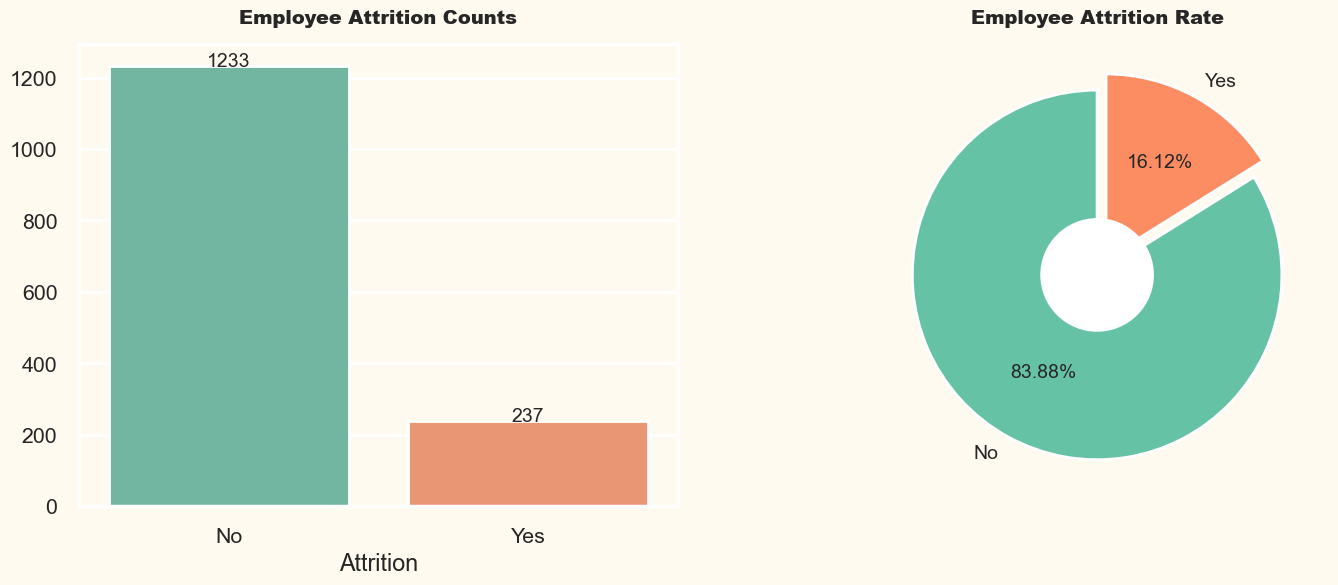

In [15]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = df["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2')
plt.title("Employee Attrition Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* The Employee Attrition rate of this organization is 16.12%. 
* The data is unbalanced. 

In [16]:
def pie_bar_plot(df, col, hue):
    plt.figure(figsize=(14, 6))
    
    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()
    
    # First subplot: Pie chart
    plt.subplot(1, 2, 1) 
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90, 
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    
    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)
    new_df = df[df[hue] == 'Yes']
    value_1 = value_counts
    value_2 = new_df[col].value_counts().sort_index()  # Sort the values in the same order
    ax2 = np.floor((value_2 / value_1) * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')
    plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()


#### 2. Analyzing Employee Attrition by Gender.

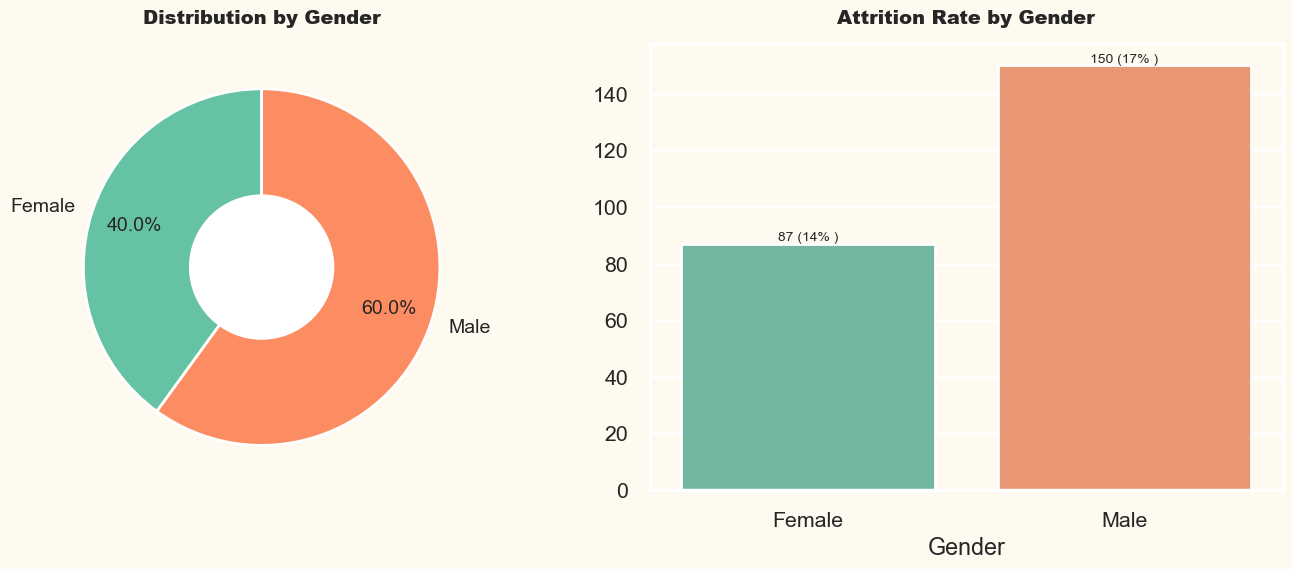

In [17]:
pie_bar_plot(df, 'Gender', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Male employees accounts for a higher proportion than female employees by more than 20%.  
* Attrition in male employees is higher compared to female employees.

#### 3. Analyzing Employee Attrition by Marital Statusa

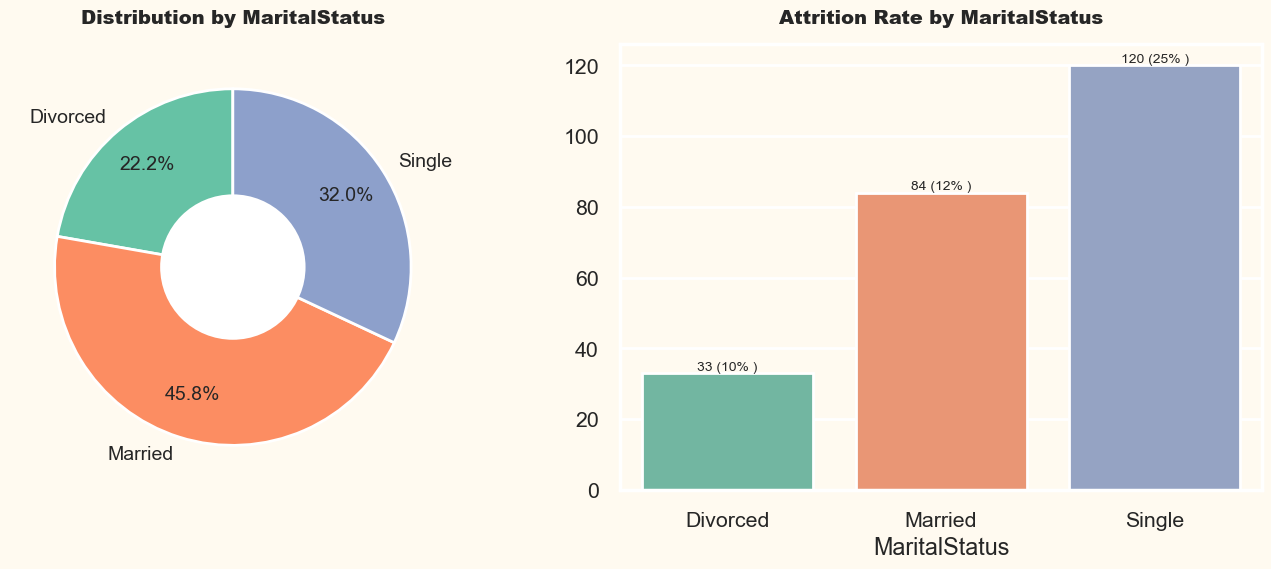

In [18]:
pie_bar_plot(df, 'MaritalStatus', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees are Married in the organization.  
* The attrition rate is very high of employees who are divorced.  
* The attrition rate is low for employees who are single.

#### 4. Analyzing Employee Attrition by Business Travel.

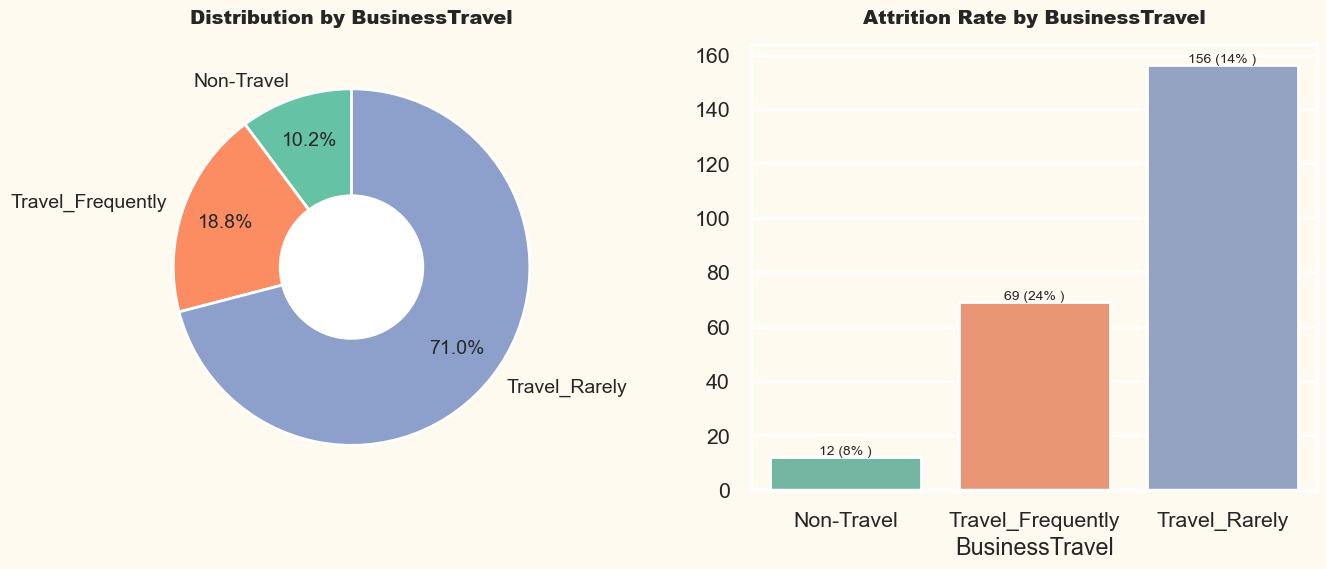

In [19]:
pie_bar_plot(df, 'BusinessTravel', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees in the organization Travel Rarely.
* Highest employee attrition can be observed by those employees who Travels Frequently.
* Lowest employee attrition can be observed by those employees who are Non-Travel.

#### 5. Analyzing Employee Attrition by Department.

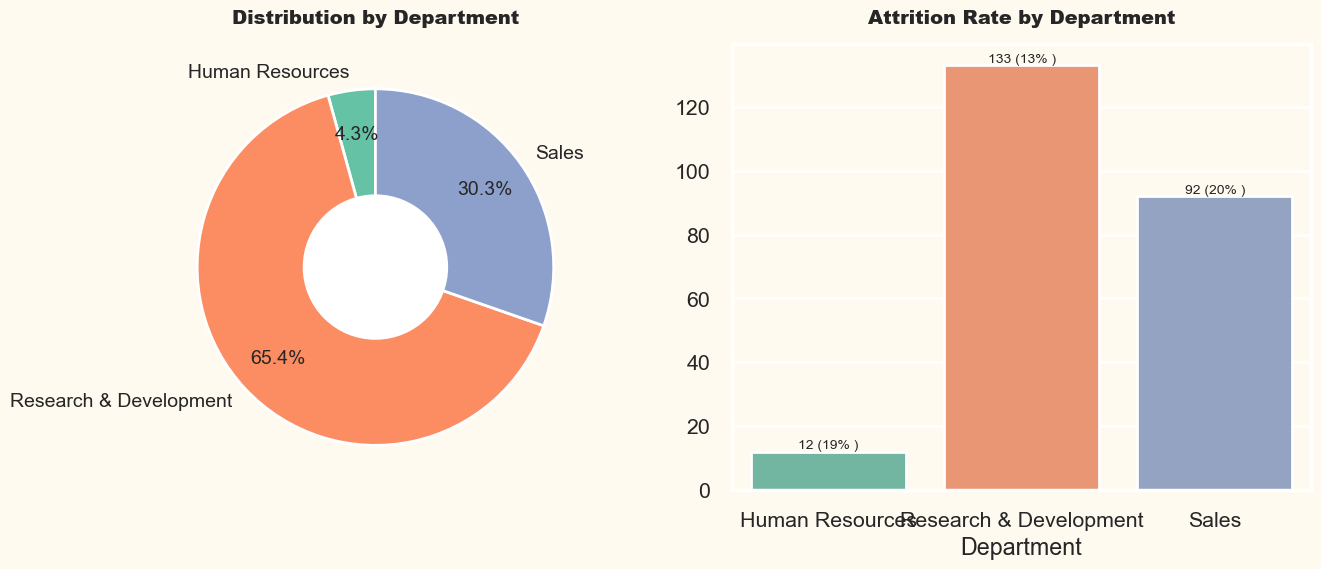

In [20]:
pie_bar_plot(df, 'Department', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees are from Research & Development Department (65.4%).  
* Highest Attrition is in the Sales Department.  
* Human Resources Department Attrition rate is also very high.  
* Attrition in Research & Development Department is least compared to other departments.  

#### 6. Analyzing Employee Attrition by Education.

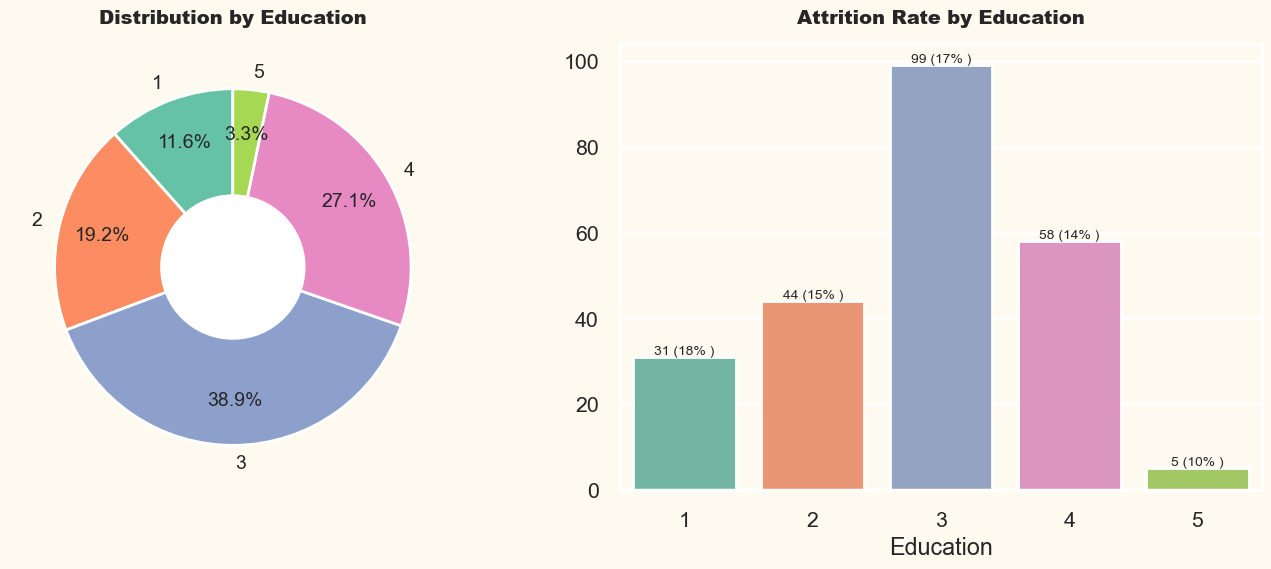

In [21]:
pie_bar_plot(df, 'Education', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees in the organization have completed Bachelors or Masters degree.    
* Very few employees in the organization have completed Doctorate degree.    
* Employee those who have not completed college (Below College level) has highest Attrition rate followed by Bachelor degree holder. 

In [22]:
def hist_with_hue(df, col, hue):
    plt.figure(figsize=(13.5, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue=hue, data=df, kde=True, palette='Set2')
    
    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha = 'center')  # Rotate x-axis labels by 90 degrees and center-align
    
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=hue, y=col, data=df, palette='Set2')
    plt.title(f"Distribution by {col} & {hue}", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()

#### 7. Employee Distribution by Age

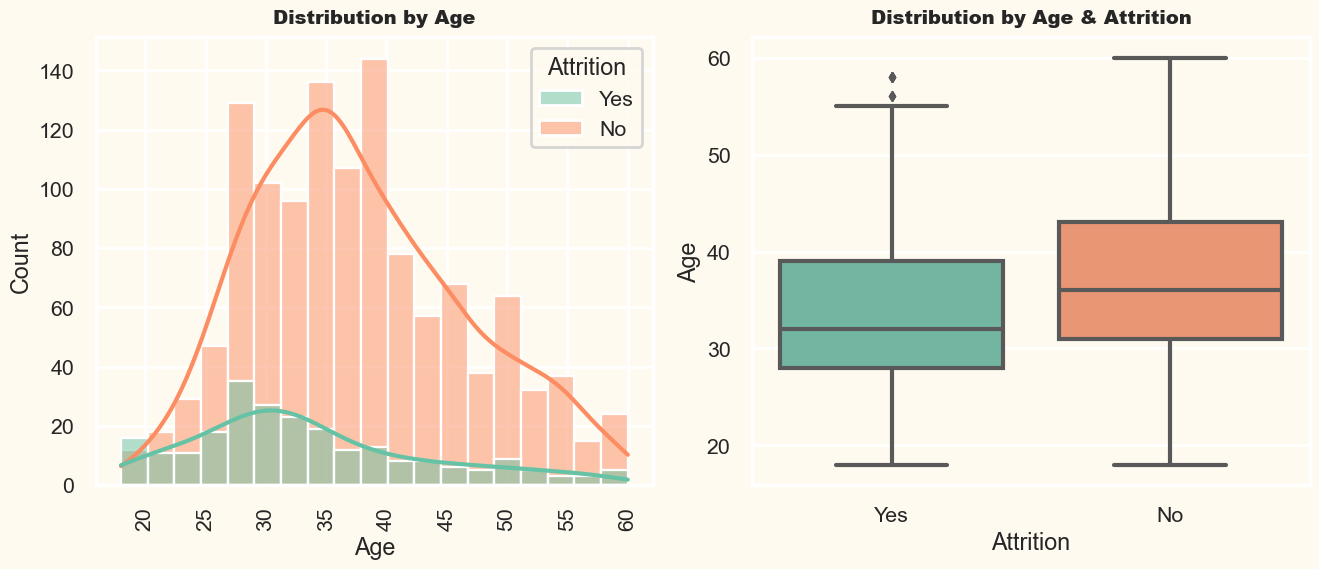

In [23]:
hist_with_hue(df, 'Age', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the emloyees are between age 30 to 40.      
* We can clearly observe a trend that as the age is increasing the attrition is decreasing.    
* The medain age of employee who left the organization is less than the employees who are working.    
* Employees with young age leaves the company more compared to elder employees. 

In [24]:
def count_percent_plot(df, col, hue):

    plt.figure(figsize=(13.5, 8))
    plt.subplot(1, 2, 1)
    value_1 = df[col].value_counts()
    sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='Set2')
    plt.title(f"Employees by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_1.values):
        count_percentage = "{:.1f}%".format((value / len(df)) * 100)
        plt.text(index, value, f"{value} ({count_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    # Sort the values for the second subplot to match the order of the first subplot
    value_2 = df[df[hue] == 'Yes'][col].value_counts().reindex(value_1.index)

    plt.subplot(1, 2, 2)
    attrition_rate = (value_2 / value_1 * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='Set2')
    plt.title(f"Employee Attrition by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2.values):
        attrition_percentage = "{:.1f}%".format(np.round(attrition_rate[index], 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

#### 8. Analyzing Employee Attrition by Education Field

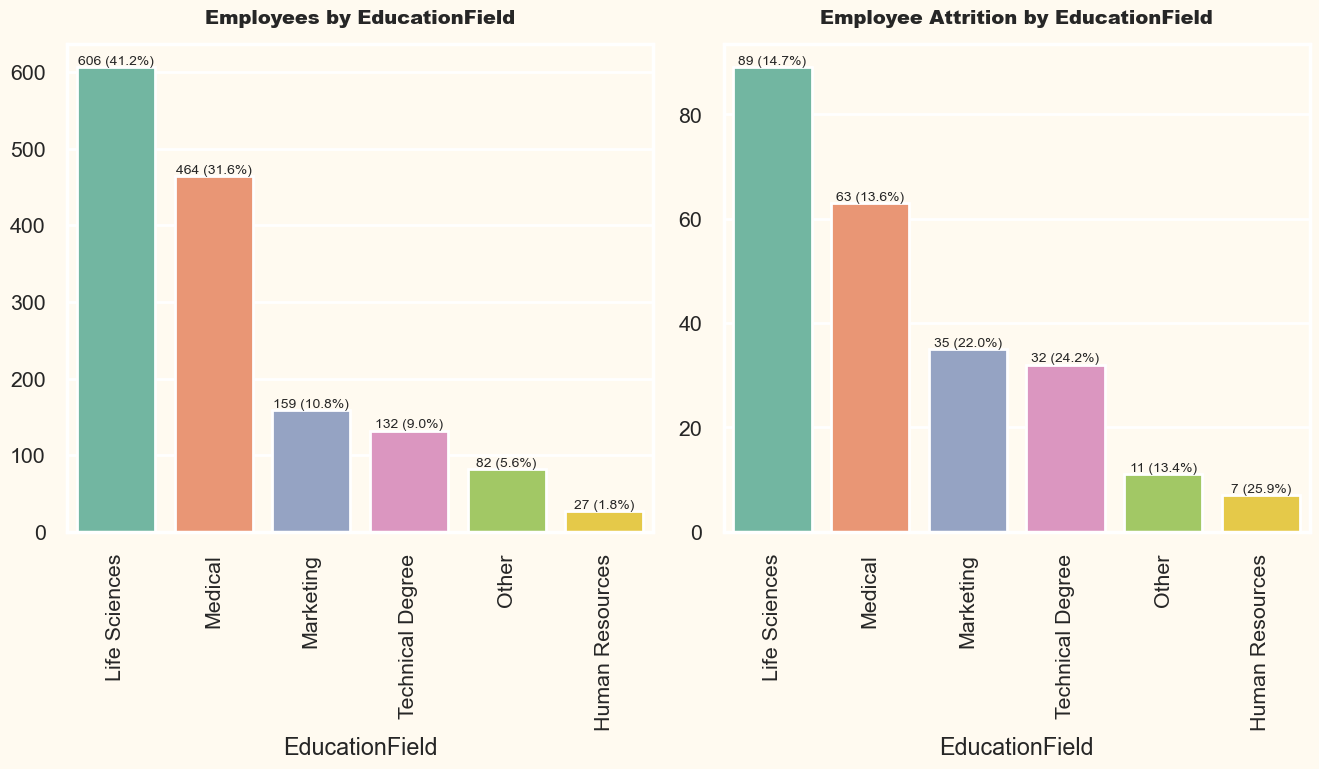

In [25]:
count_percent_plot(df, 'EducationField', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees are either from Life Science or Medical Education Field.    
* Very few employees are from Human Resources Education Field.    
* Education Fields like Human Resources, Technical, Marketing is having very high attrition rate.      
* This may be because of work load becuase there are very few employees in these education fields compared to education field with less attrition rate. 

#### 9. Analyzing Employee Attrition by Environment Satisfaction.

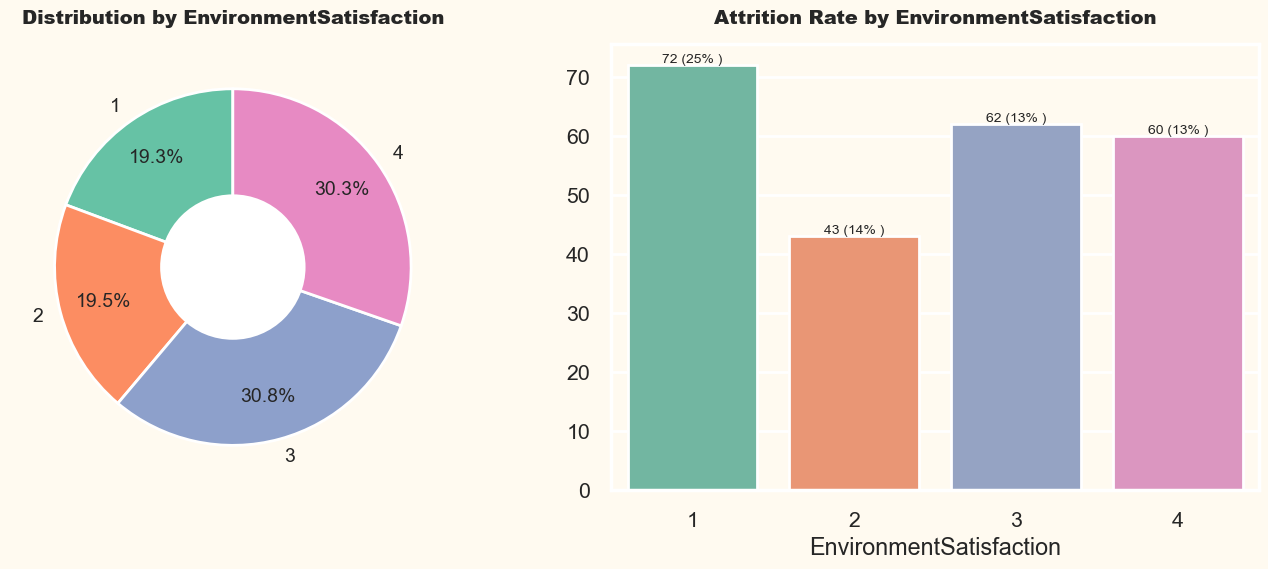

In [26]:
pie_bar_plot(df, 'EnvironmentSatisfaction', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees have rated the organization environment satisfaction 3 & 4.    
* Attrition Rate is high among the employee with 4 level of environment satisfication.

#### 10. Analyzing Employee Attrition by Job Satisfaction.

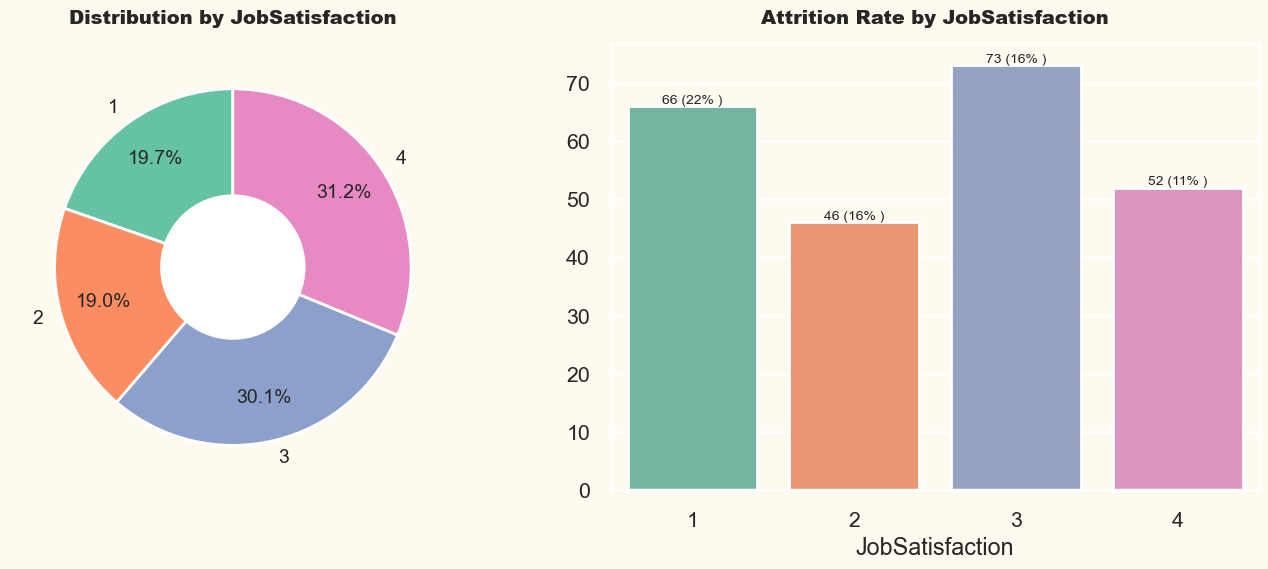

In [27]:
pie_bar_plot(df, 'JobSatisfaction', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees have rated their job satisfaction as 3 or 4.  
* Employees who rated their job satisfaction low are mostly leaving the organization. 

#### 11. Analyzing Employee Attrition by Relationship Satisfaction.

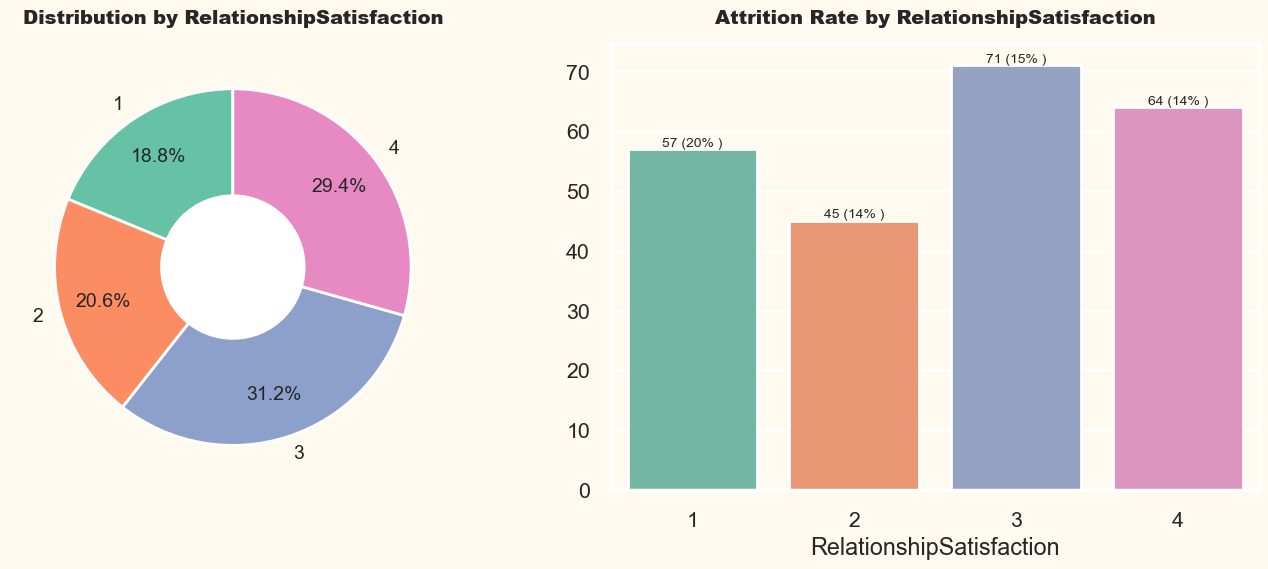

In [28]:
pie_bar_plot(df, 'RelationshipSatisfaction', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

*  Most of the employees are having high or very high relationship satisfaction.  
* Employe with 'low' relationship satification are most likely to leave the organisation.

#### 12. Analyzing Employee Attrition by Work Life Balance.

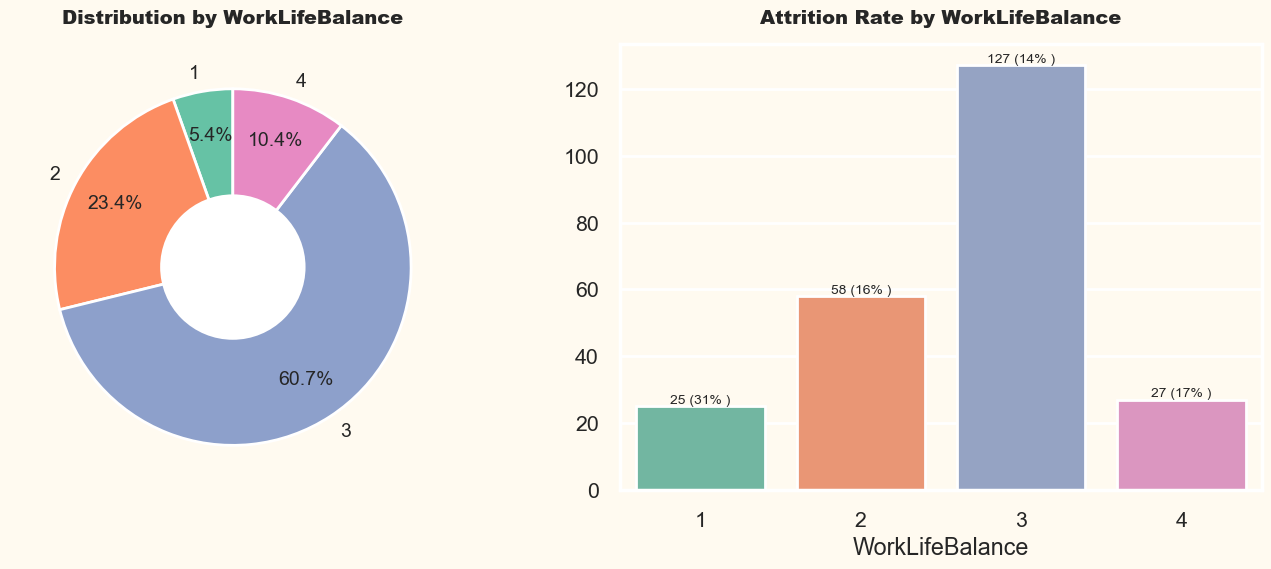

In [29]:
pie_bar_plot(df, 'WorkLifeBalance', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* More than 60% of employees are having a better work life balance.  
* Employees with Bad Work Life Balance is having very high Attrition Rate.  

#### 13. Analyzing Employee Attrition by Performance Rating.

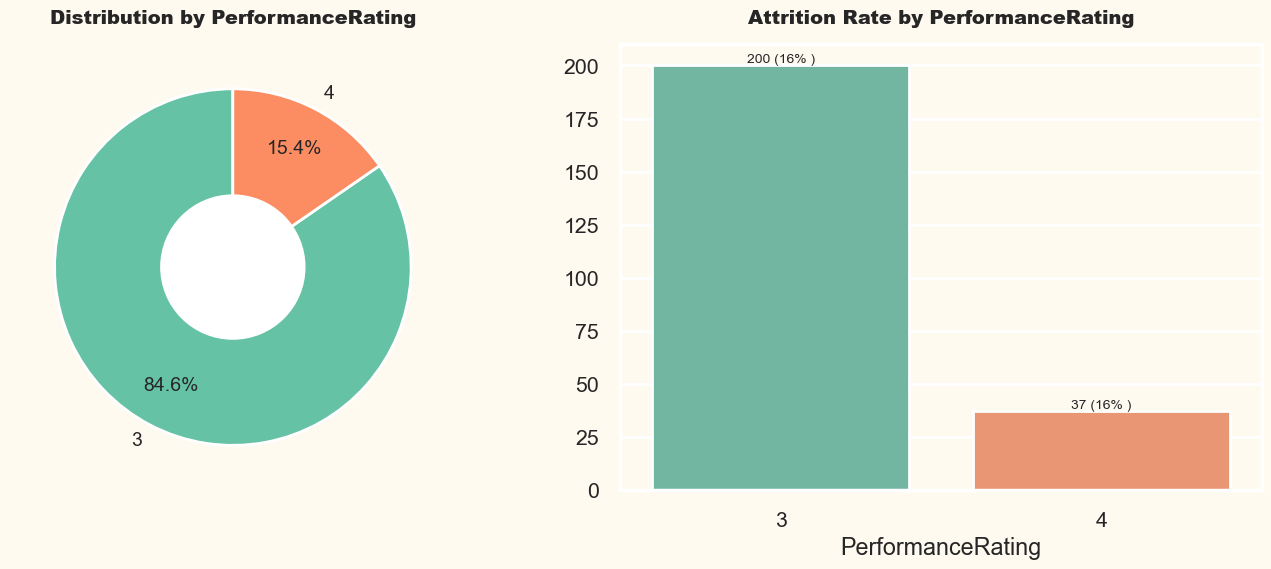

In [30]:
pie_bar_plot(df, 'PerformanceRating', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees are having excellent performance rating.    

#### 14. Analyzing Employee Attrition by Over Time.

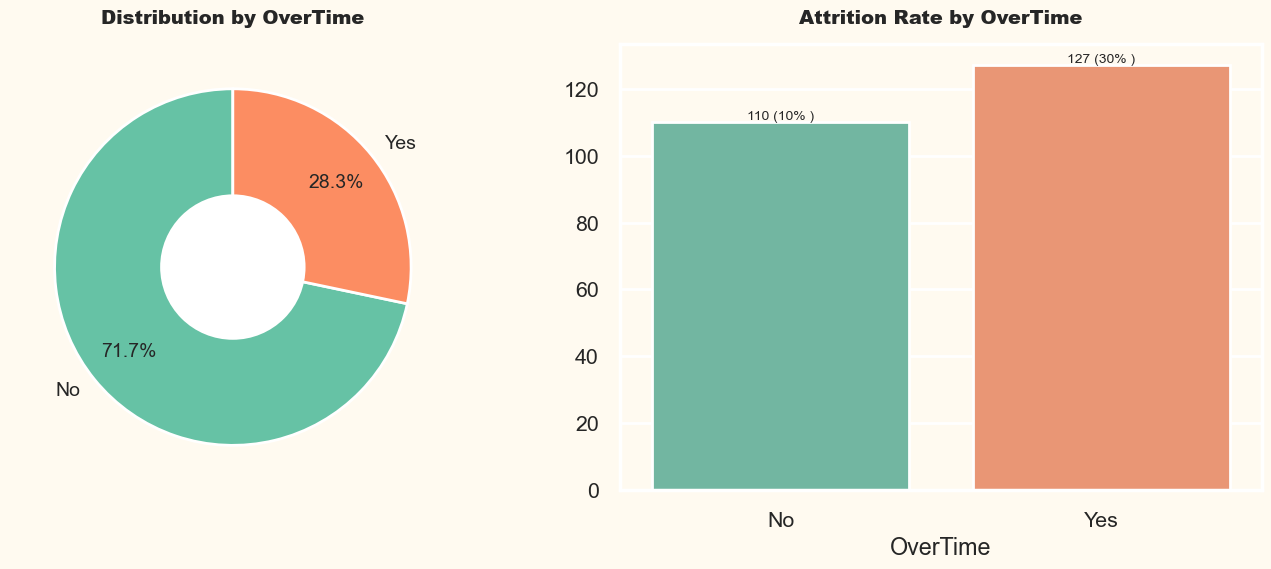

In [31]:
pie_bar_plot(df, 'OverTime', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees don't OverTime.  
* There is high attrition among those who overtime i.e work for more hours than regular working hours. 

#### 15. Analyzing Employee Attrition by Daily Rate.

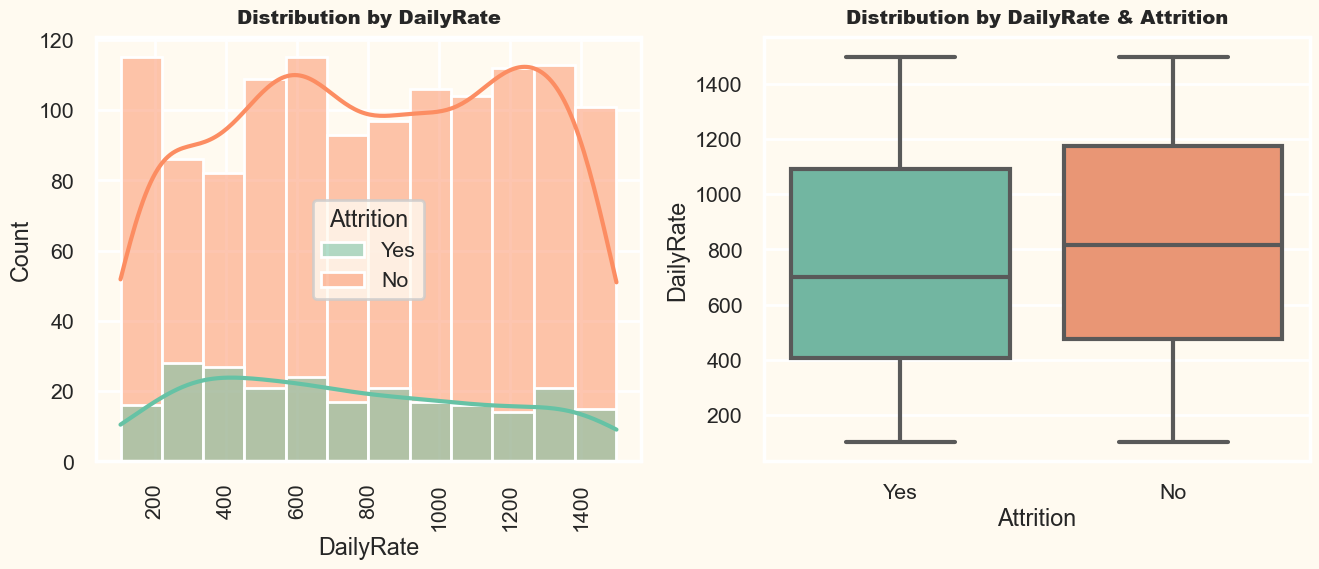

In [32]:
hist_with_hue(df, 'DailyRate', 'Attrition')

 <div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* The medain dailyrate of employee who left the organization is less than the employees who are working.

#### 16. Analyzing Employee Attrition by Job Roles 

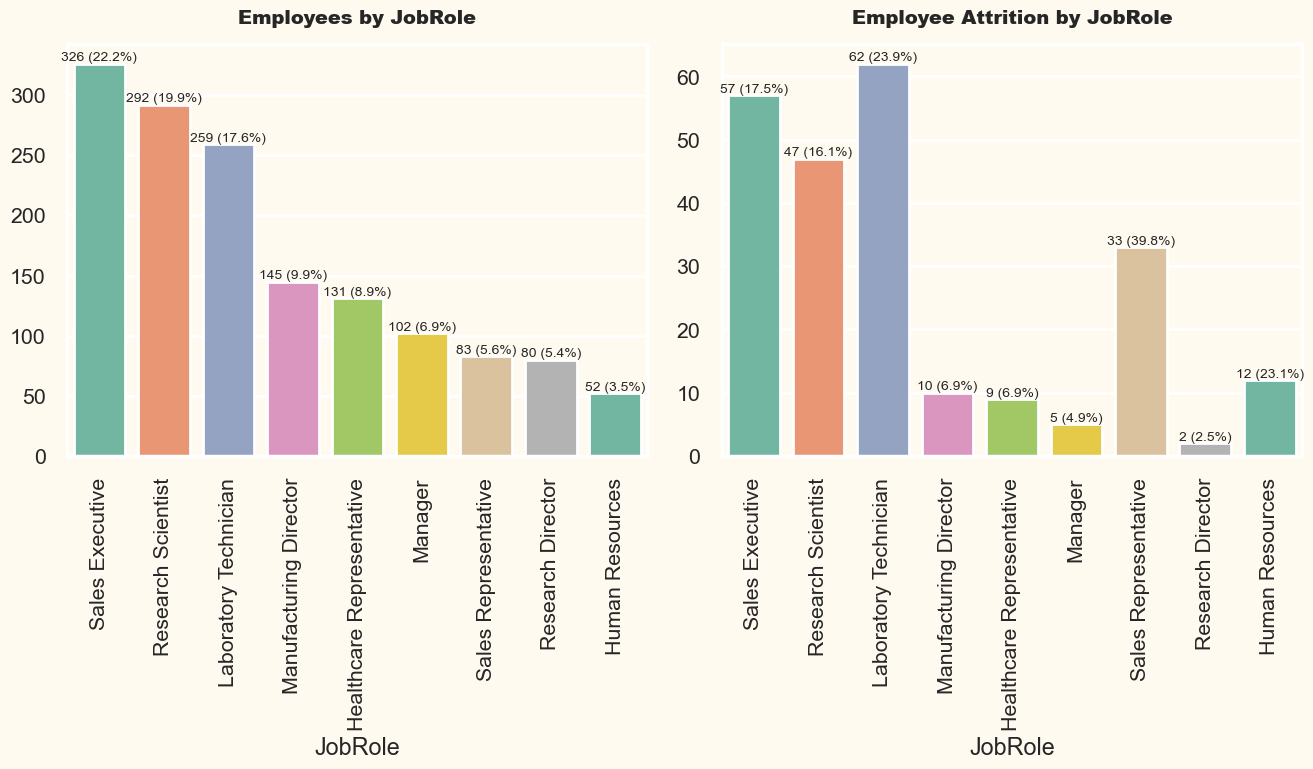

In [33]:
count_percent_plot(df, 'JobRole', 'Attrition')

Inference:    


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most employees is working as Sales executive, Research Scientist or Laboratory Technician.  
* Highest attrition rates are in role of Sale Representative.  

#### 17. Analyzing Employee Attrition by Job Level.

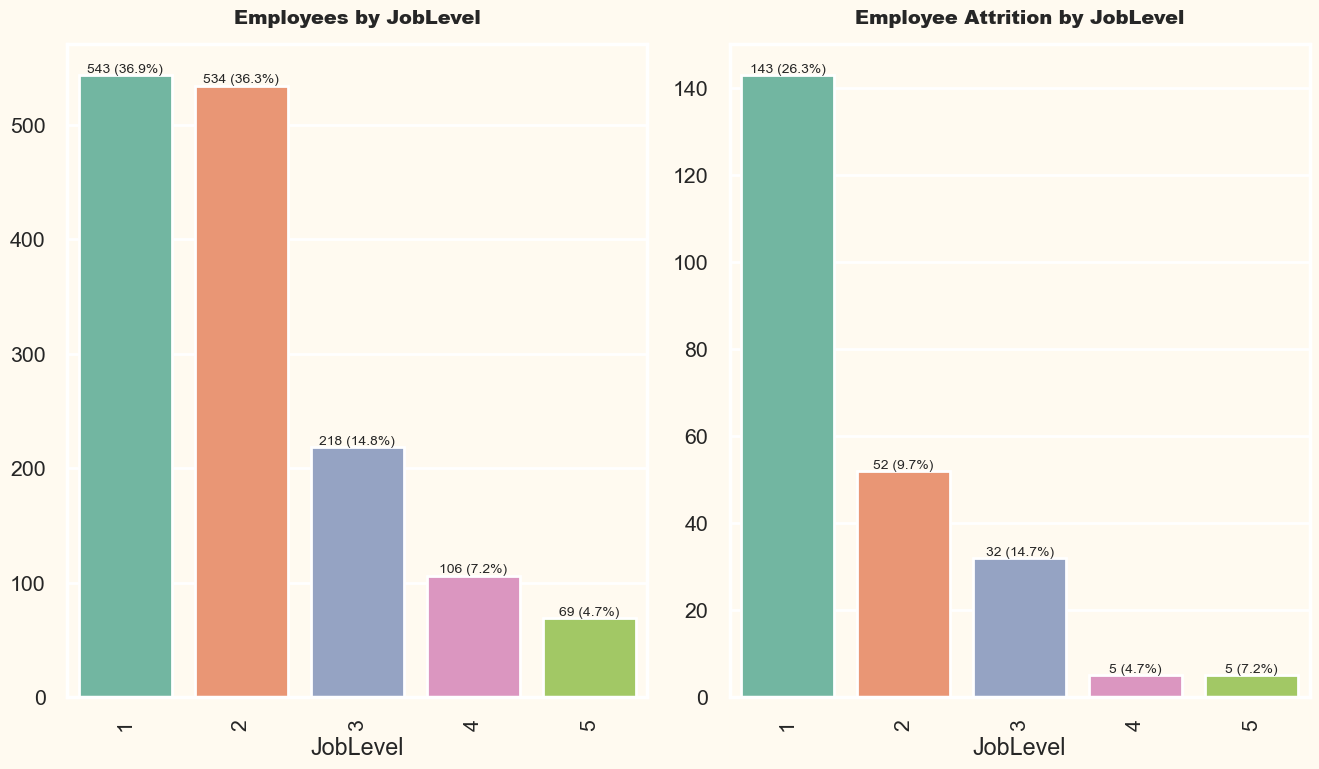

In [34]:
count_percent_plot(df, 'JobLevel', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees in the organization are at Entry Level or Junior Level.  
* Highest Attrition is at the Entry Level.

#### 18. Analyzing Employee Attrition by Monthly Income.

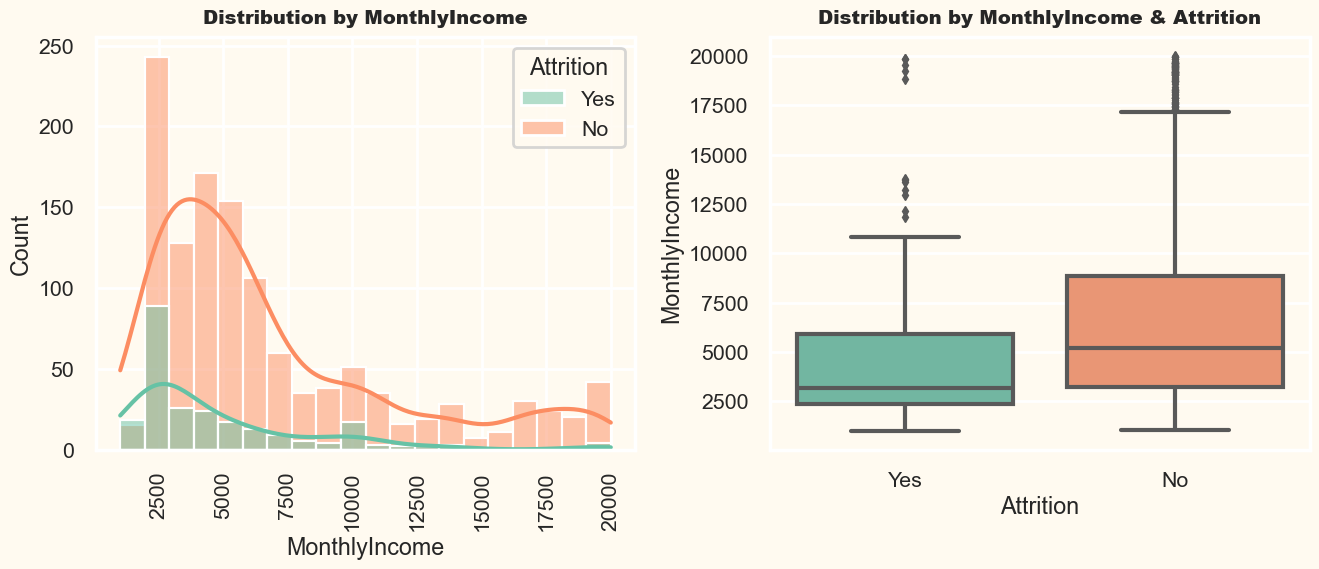

In [35]:
hist_with_hue(df, 'MonthlyIncome', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees are getting paid less than 10000 in the organiation.  
* The median monthly income of employee who have left is comparatively low with employee who are still working.  
* As the Monthly Income increases the attrition decreases.  

#### 19. Analyzing Employee Attrition by Monthly Rate.

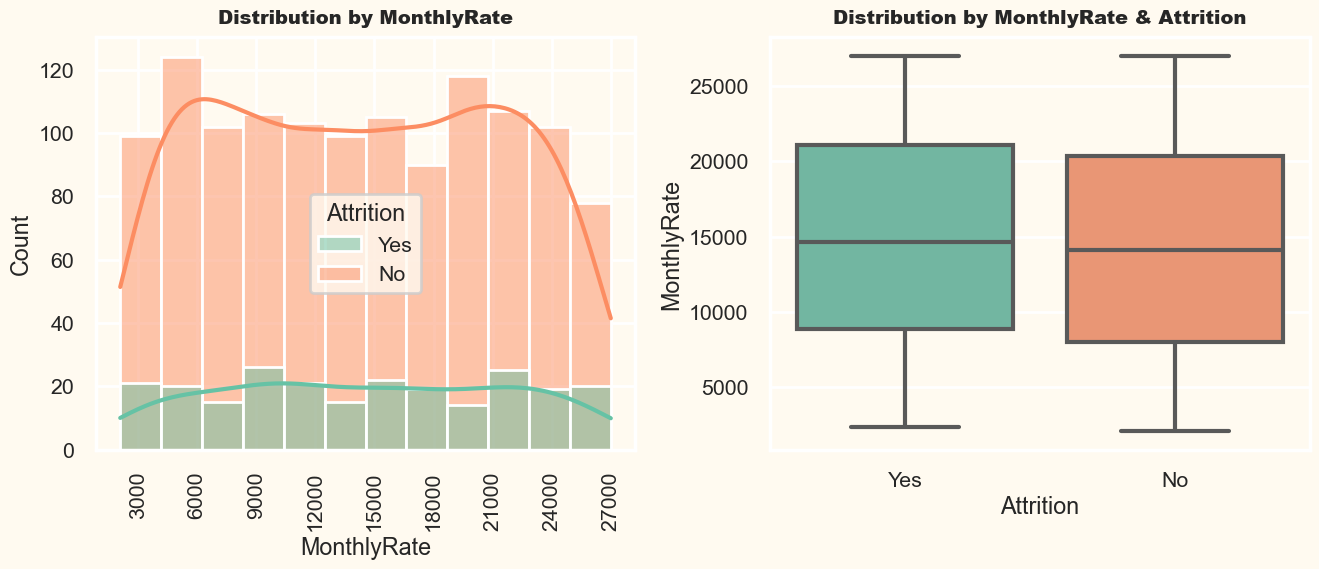

In [36]:
hist_with_hue(df, 'MonthlyRate', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* The distribution of MonthlyRate is similar througout the column.  
* So this feature doesn't provide any meaningful insights in the employee attrition.

#### 20. Analyzing Employee Attrition by Distance From Home

In [37]:
print("Total Unique Values in 'DistanceFromHome' Attribute is =>",df["DistanceFromHome"].nunique())

Total Unique Values in 'DistanceFromHome' Attribute is => 29


In [38]:
df["DistanceFromHome"].describe().to_frame().T

count      mean       std  min  25%  50%   75%   max
DistanceFromHome  1470.0  9.192517  8.106864  1.0  2.0  7.0  14.0  29.0

In [39]:
# Define the bin edges for the groups
bin_edges = [0,5,10,15,20,30]

# Define the labels for the groups
bin_labels = ['0-5 kms', '6-10 kms', '11-15 kms','16-20 kms', '20+ kms']

# Cuttinf the DistaanceFromHome column into groups
df['DistanceGroup'] = pd.cut(df['DistanceFromHome'], bins=bin_edges, labels=bin_labels)

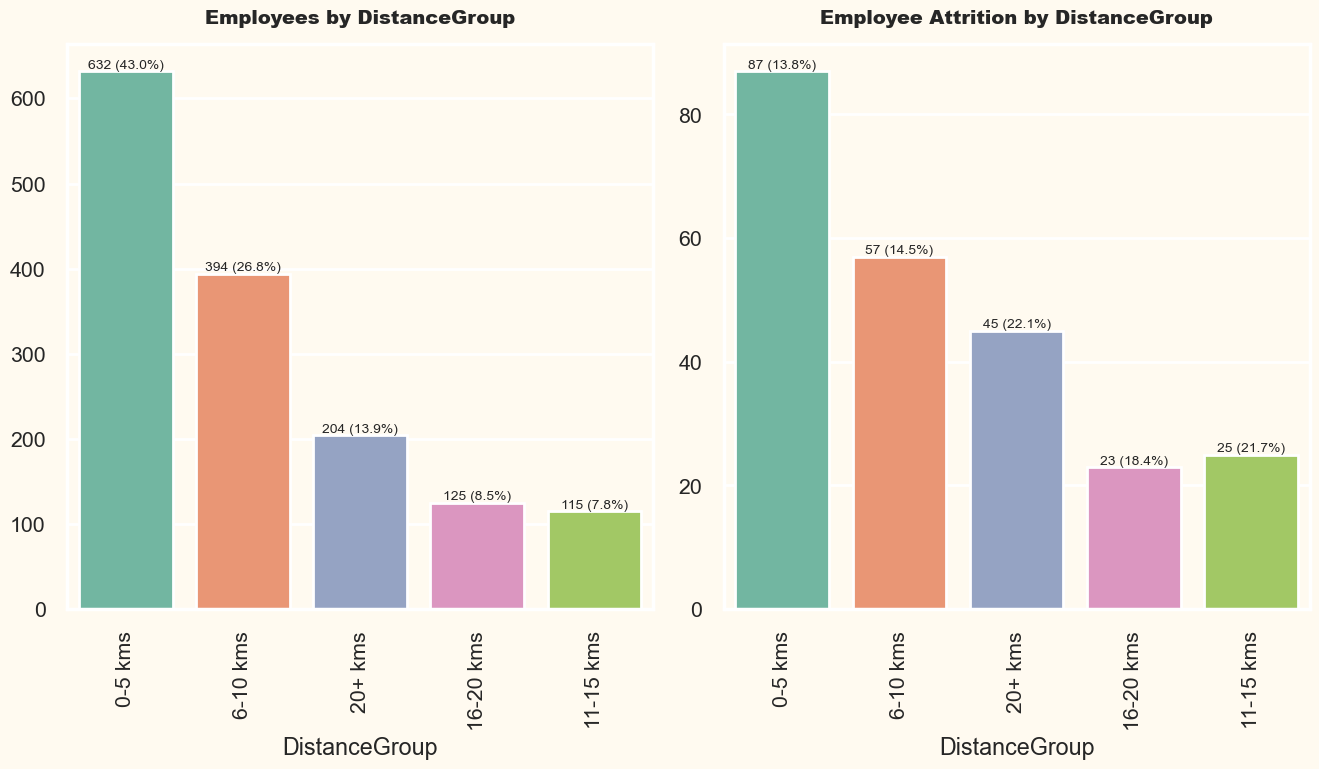

In [40]:
count_percent_plot(df, 'DistanceGroup', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees are living within 10kms radius from the organisation.  
* As the distance from the organisation increases, Attrition Rate also increases.

### 21 Analyzing Employee Attrition by Number of Companies Worked.

In [41]:
print("Total Unique Values in 'NumCompaniesWorked' Attribute is =>",df["NumCompaniesWorked"].nunique())

Total Unique Values in 'NumCompaniesWorked' Attribute is => 10


In [42]:
df["NumCompaniesWorked"].describe().to_frame().T

count      mean       std  min  25%  50%  75%  max
NumCompaniesWorked  1470.0  2.693197  2.498009  0.0  1.0  2.0  4.0  9.0

In [43]:
# Define the bin edges for the groups
bin_edges = [-1, 1, 3, 5, 10]     # starting from -1 since we have '0' in the data

# Define the labels for the groups
bin_labels = ['0-1 Companies', '2-3 companies', '4-5 companies', "6-9 companies"]

# Cut the DailyRate column into groups
df["NumCompaniesWorkedGroup"] = pd.cut(df['NumCompaniesWorked'], bins=bin_edges, labels=bin_labels)

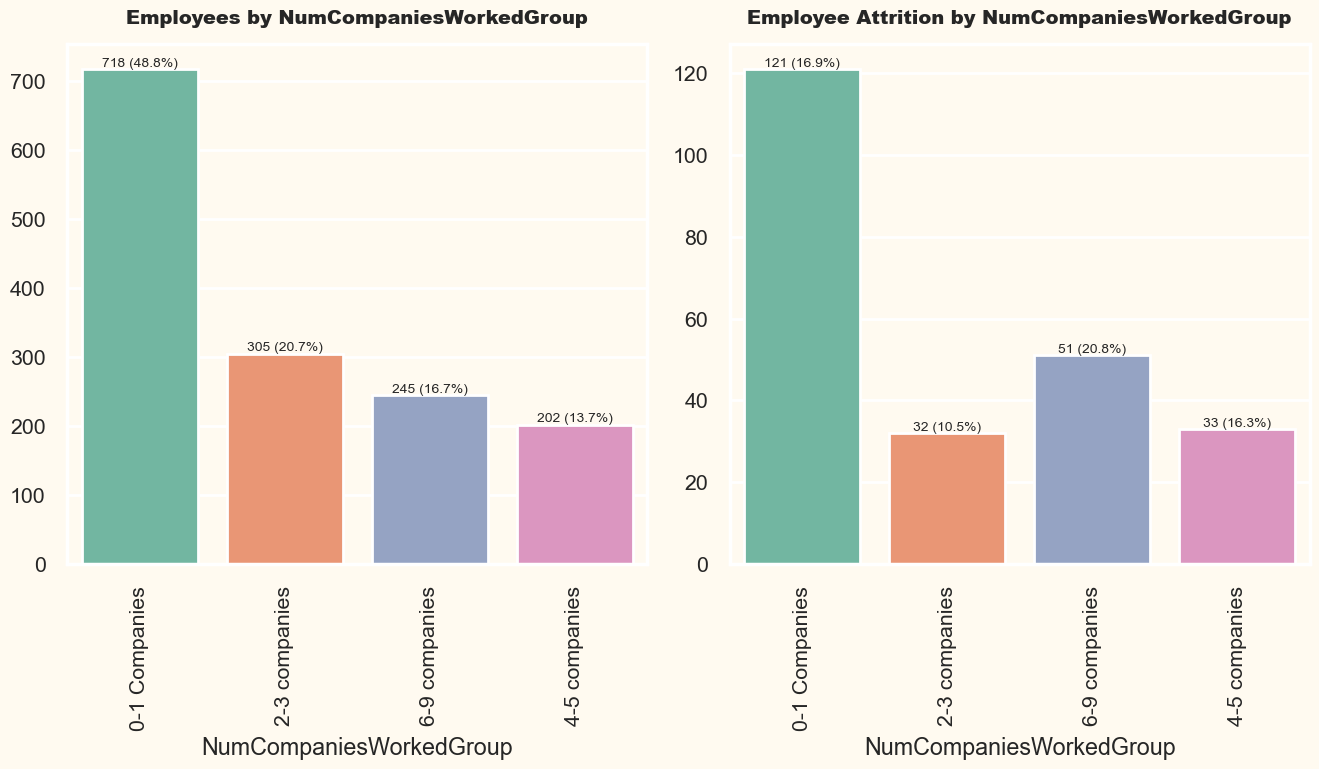

In [44]:
count_percent_plot(df, 'NumCompaniesWorkedGroup', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees have worked for less than 2 companies.  
* There's a high attrition rate of employees who haved worked for more than 5 companies followed by the employee who have worked for less than two companies

#### 22. Analyzing Employee Attrition by Percentage Salary Hike.

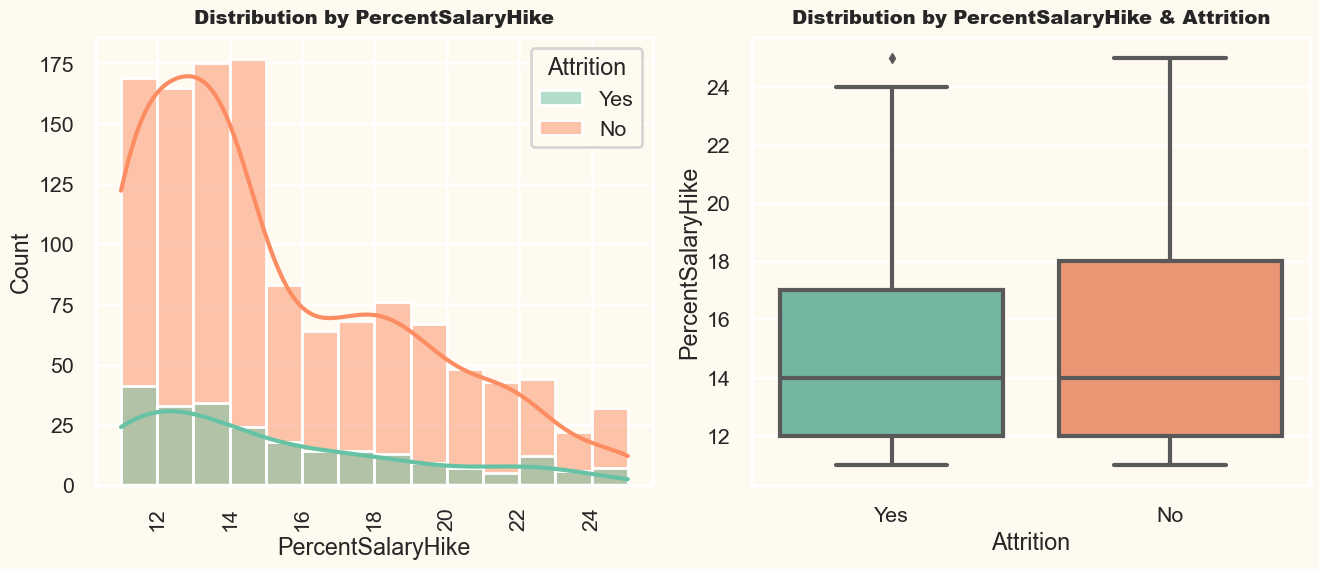

In [45]:
hist_with_hue(df, 'PercentSalaryHike', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Very Few employees are getting a high percent salary hike.  
* As the amount of percent salary increases the attrition rate decreases. 

#### 23. Analyzing Employee Attrition by Total Working Years.

In [46]:
print("Total Unique Values in 'TotalWorkingYears' Attribute is =>",df["TotalWorkingYears"].nunique())

Total Unique Values in 'TotalWorkingYears' Attribute is => 40


In [47]:
df["TotalWorkingYears"].describe().to_frame().T

count       mean       std  min  25%   50%   75%   max
TotalWorkingYears  1470.0  11.279592  7.780782  0.0  6.0  10.0  15.0  40.0

In [48]:
# Define the bin edges for the groups
bin_edges = [-1, 3, 5, 10, 20, 50]     # starting from -1 since we have '0' in the data

# Define the labels for the groups
bin_labels = ['0-3 years', '4-5 years', '6-10 years', '11-20 years', "20+ years"]

# Cut the DailyRate column into groups
df["TotalWorkingYearsGroup"] = pd.cut(df['TotalWorkingYears'], bins=bin_edges, labels=bin_labels)

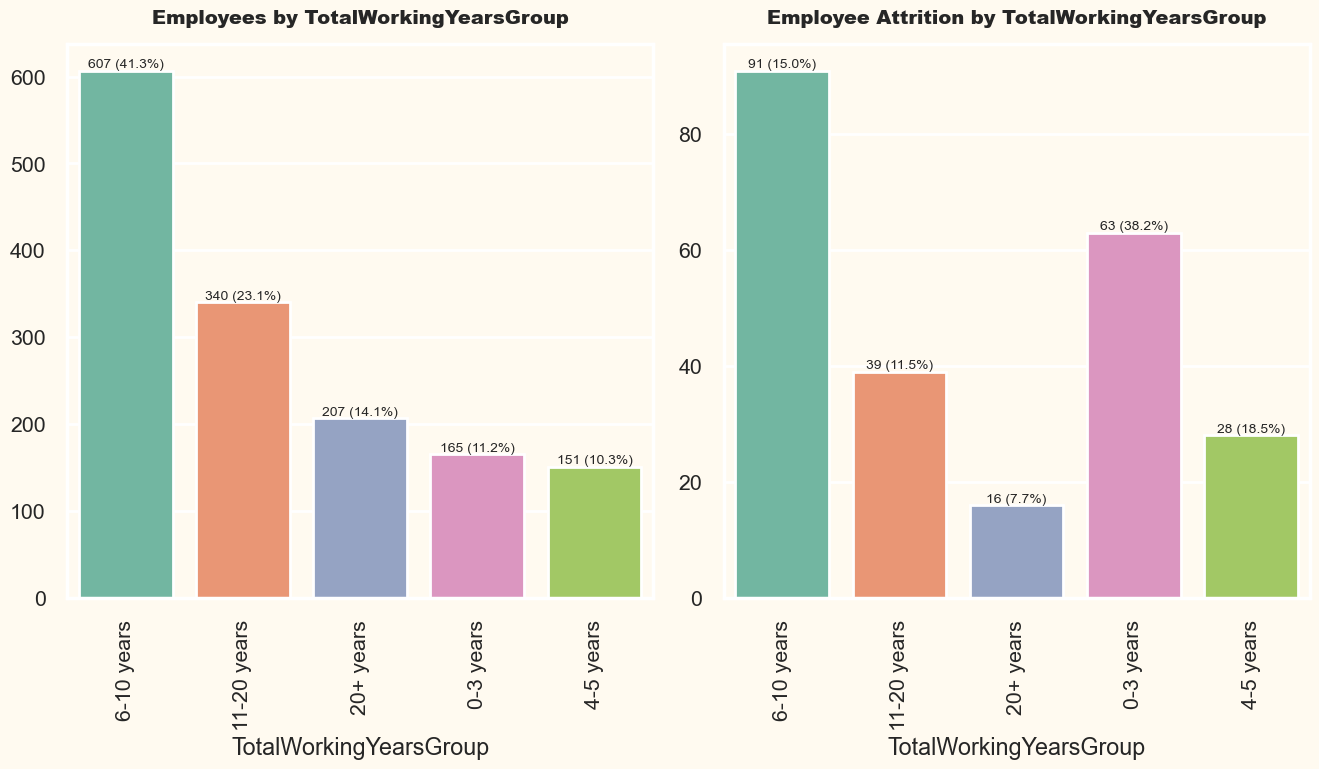

In [49]:
count_percent_plot(df, 'TotalWorkingYearsGroup', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the employees are having a total of 6 to 10 years of working experience.  
* Employee with working experience upto 3 years are having High Attrition Rate.
* Employee with working experience of above 10 years are having Less Attrition Rate.m

#### 24. Analyzing Employee Attrition by Years at Company.

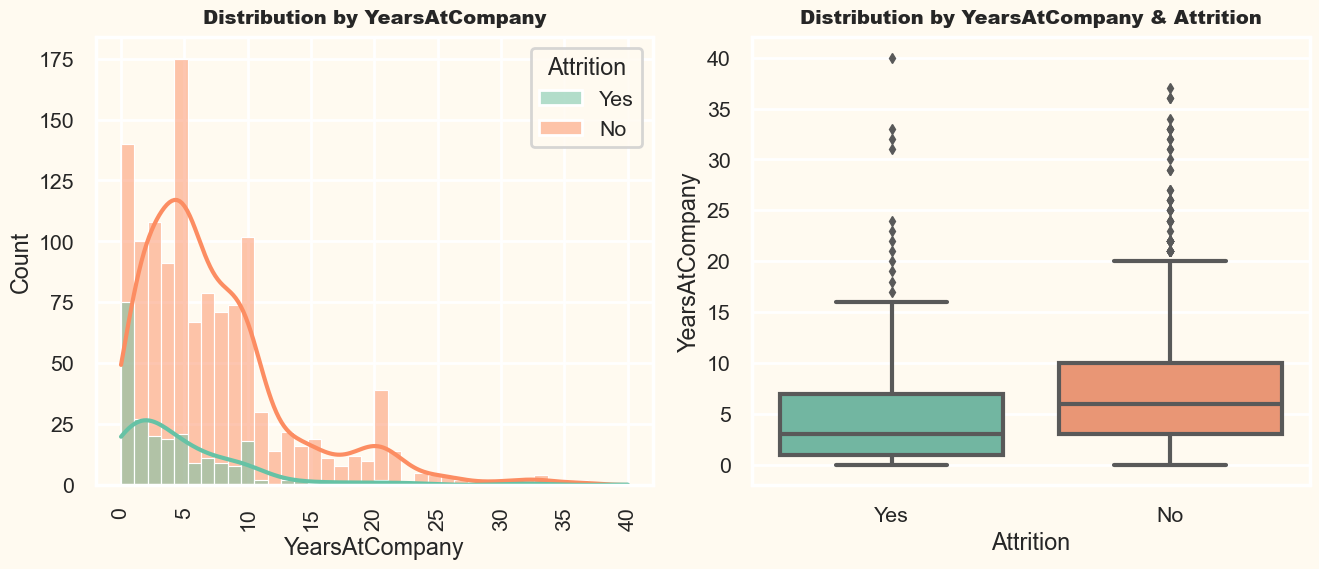

In [50]:
hist_with_hue(df, 'YearsAtCompany', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Employee who have worked for 10+ years are having low attrition rate.
* Highest Attrition is in the first year of employee joining organisation.

#### 25. Analyzing Employee Attrition by Years In Current Role

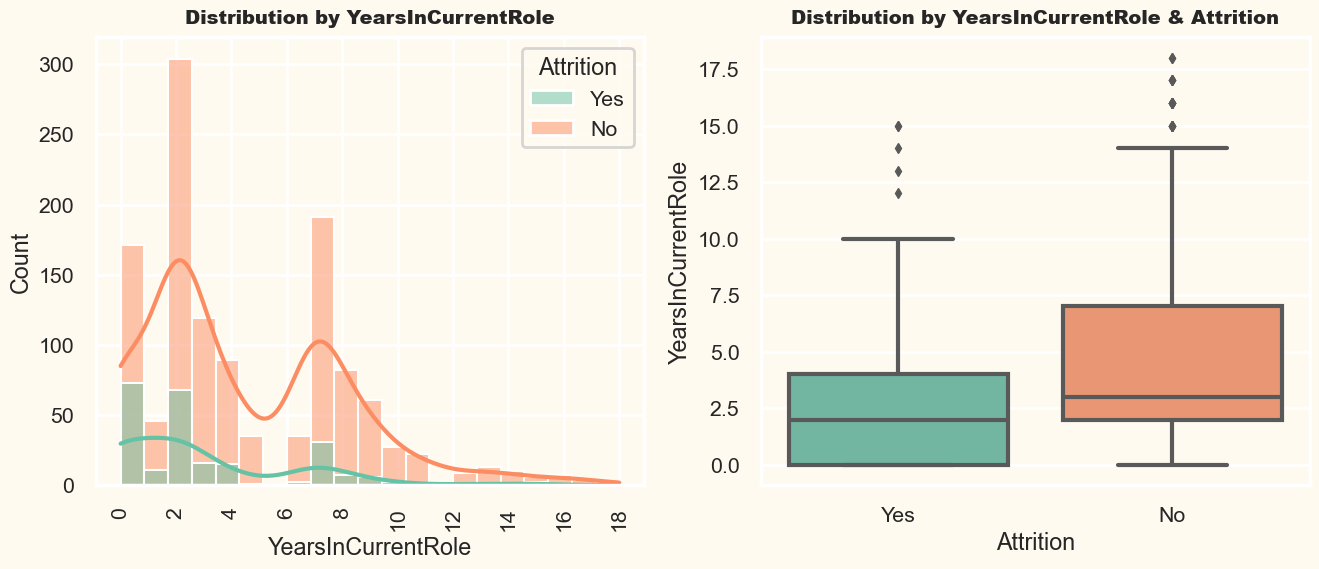

In [51]:
hist_with_hue(df, 'YearsInCurrentRole', 'Attrition')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Employee who have worked for 8+ years in Current Role are less likely to leave organisation.
* Highest Attrition is in the first two year of the Current Role.

#### 26. Analyzing Employee Attrition by Years Since Last Promotion

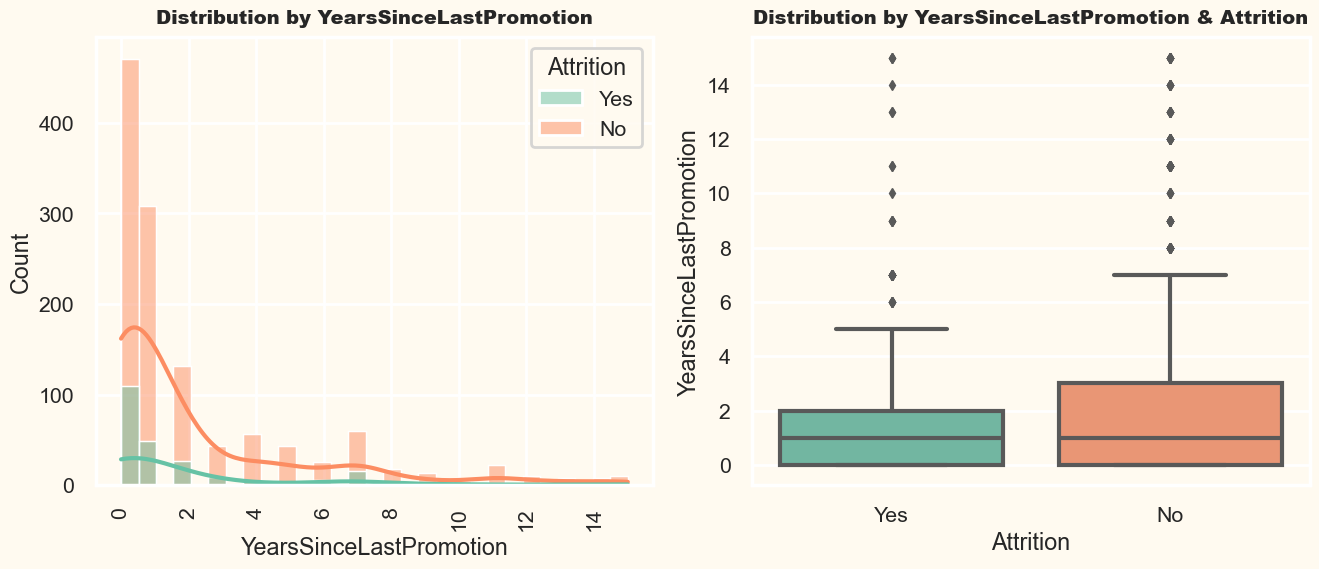

In [52]:
hist_with_hue(df, 'YearsSinceLastPromotion', 'Attrition')

#### 27. Analyzing Employee Attrition by Years with Current Manager.

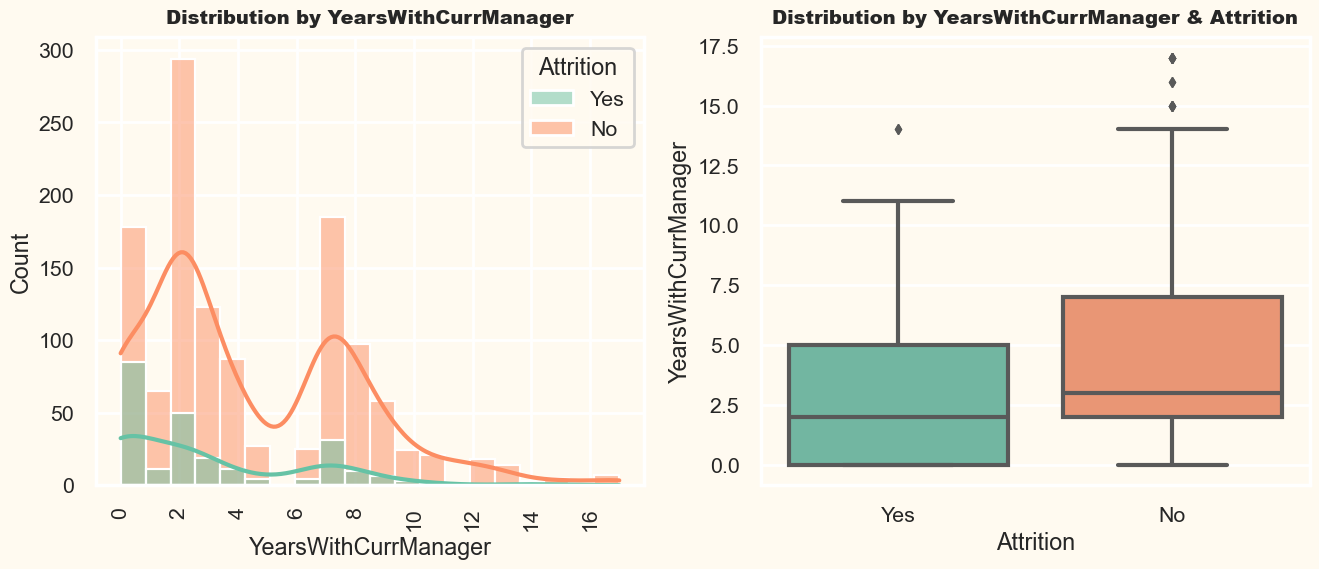

In [53]:
hist_with_hue(df, 'YearsWithCurrManager', 'Attrition')

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Statistical Analysis - Feature Importance </div> 

### 1. Performing ANOVA Test to Analyze the Numerical Features Importance in Employee Attrition.

In [54]:
num_cols = df.select_dtypes(np.number).columns

In [55]:
new_data = df.copy()
new_data["Attrition"] = new_data["Attrition"].replace({"No":0,"Yes":1})

In [56]:
f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(new_data[column],new_data["Attrition"])
    
    f_scores[column] = f_score
    p_values[column] = p_value

#### Visualizing the F_Score of ANOVA Test of Each Numerical features.

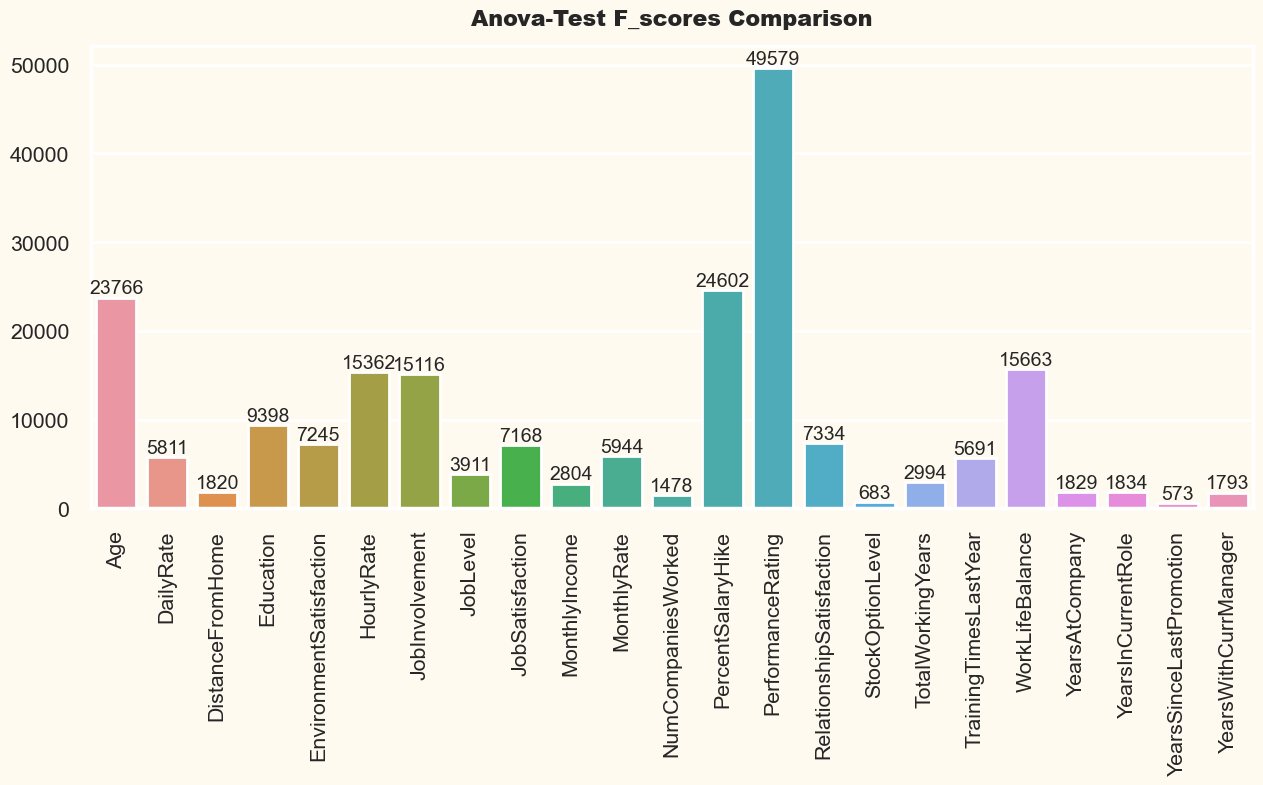

In [57]:
plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison", fontweight="black", size=16, pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom", size=14)
plt.show()

#### Comparing F_Score and P_value of ANOVA Test.

In [58]:
annova_data = pd.DataFrame({"Features":keys,"F_Score":values})
annova_data["P_value"] = [format(p, '.20f') for p in list(p_values.values())]
annova_data

Features       F_Score                 P_value
0                        Age  23766.934042  0.00000000000000000000
1                  DailyRate   5811.796569  0.00000000000000000000
2           DistanceFromHome   1820.614585  0.00000000000000000000
3                  Education   9398.987566  0.00000000000000000000
4    EnvironmentSatisfaction   7245.704914  0.00000000000000000000
5                 HourlyRate  15362.122371  0.00000000000000000000
6             JobInvolvement  15116.579563  0.00000000000000000000
7                   JobLevel   3911.331585  0.00000000000000000000
8            JobSatisfaction   7168.703089  0.00000000000000000000
9              MonthlyIncome   2804.459632  0.00000000000000000000
10               MonthlyRate   5944.089071  0.00000000000000000000
11        NumCompaniesWorked   1478.188633  0.00000000000000000000
12         PercentSalaryHike  24602.507947  0.00000000000000000000
13         PerformanceRating  49579.088833  0.00000000000000000000
14  RelationshipSatisfaction   7334.250922  0.00000000000000000000
15          StockOptionLevel    683.069576  0.00000000000000000000
16         TotalWorkingYears   2994.906310  0.00000000000000000000
17     TrainingTimesLastYear   5691.401732  0.00000000000000000000
18           WorkLifeBalance  15663.161434  0.00000000000000000000
19            YearsAtCompany   1829.442766  0.00000000000000000000
20        YearsInCurrentRole   1834.262264  0.00000000000000000000
21   YearsSinceLastPromotion    573.896430  0.00000000000000000000
22      YearsWithCurrManager   1793.291314  0.00000000000000000000

Yes, in the context of analysis using ANOVA (Analysis of Variance), a higher F-statistic for a specific feature suggests that there is more variability in the target variable (dependent variable) explained by that feature. In other words, the feature with the higher F-statistic is likely to have a more significant influence on the target variable.

### 2. Performing Chi-Square Test to Analyze the Categorical Feature Importance in Employee Attrition.

In [59]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
cat_cols.remove("Attrition")

In [60]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

#### Visualizing the Chi-Square Statistic Values of Each Categorical Features.

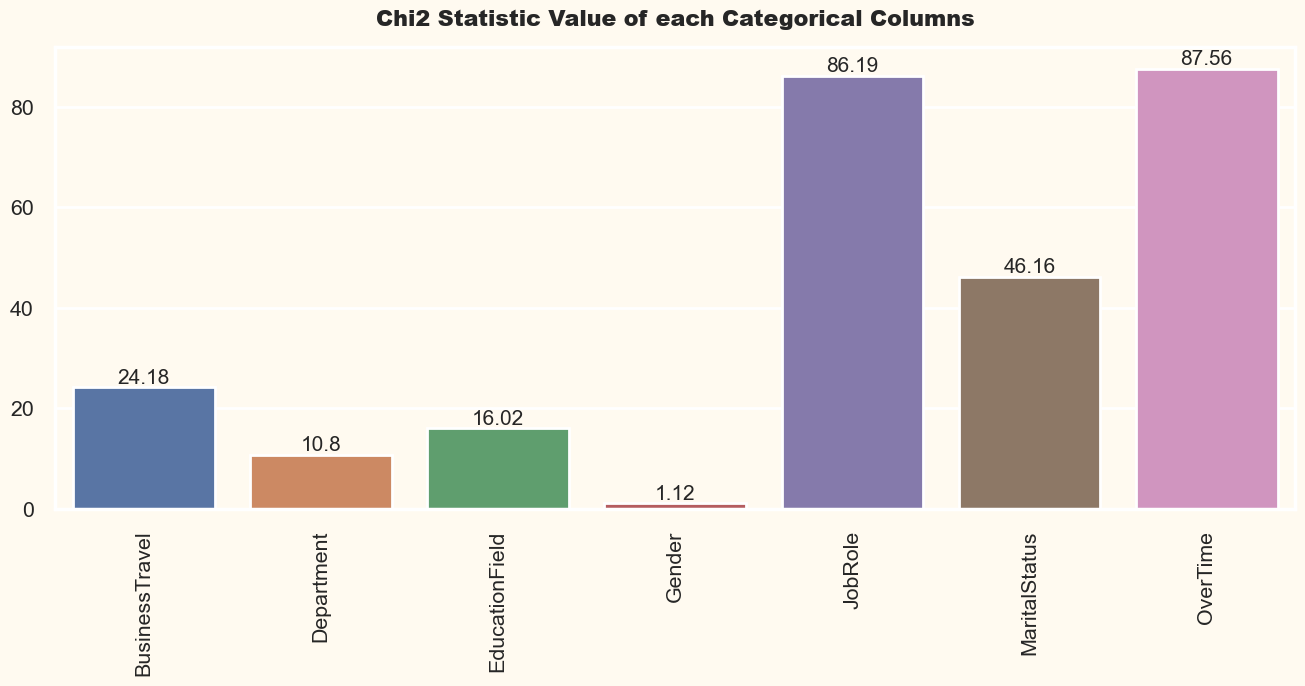

In [61]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=16,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",size=15)

plt.show()

### Compairing Chi2_Statistic and P_value of Chi_Square Test.

In [62]:
chi_data = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
chi_data["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]
chi_data

Features  Chi_2 Statistic                 P_value
0  BusinessTravel        24.182414  0.00000560861447644993
1      Department        10.796007  0.00452560657447963286
2  EducationField        16.024674  0.00677398013902521211
3          Gender         1.116967  0.29057244902890855265
4         JobRole        86.190254  0.00000000000000275248
5   MaritalStatus        46.163677  0.00000000009455511060
6        OverTime        87.564294  0.00000000000000000001

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Encoding </div> 

In [63]:
# droping the columns which we have created for analysis purpose
cols = ["DistanceGroup", "NumCompaniesWorkedGroup", "TotalWorkingYearsGroup"]
df.drop(columns=cols, inplace=True)

In [64]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [65]:
df["Gender"] = df["Gender"].replace({"Female":0 ,"Male":1})

#### Label Encoding for remaining Categorical Columns

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Attrition"] = le.fit_transform(df['Attrition'])

In [67]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [68]:
encoded = encoder.fit_transform(df[['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']])

In [69]:
encoded_df = pd.DataFrame(encoded.toarray(),columns = encoder.get_feature_names_out())

In [70]:
df = pd.concat([df,encoded_df],axis=1)

In [71]:
df = df.drop(['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime'],axis =1)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int32  
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EnvironmentSatisfaction            1470 non-null   int64  
 6   Gender                             1470 non-null   int64  
 7   HourlyRate                         1470 non-null   int64  
 8   JobInvolvement                     1470 non-null   int64  
 9   JobLevel                           1470 non-null   int64  
 10  JobSatisfaction                    1470 non-null   int64  
 11  MonthlyIncome                      1470 non-null   int64

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Correlation Matrix </div> 

<Axes: title={'center': 'Correlation Plot'}>

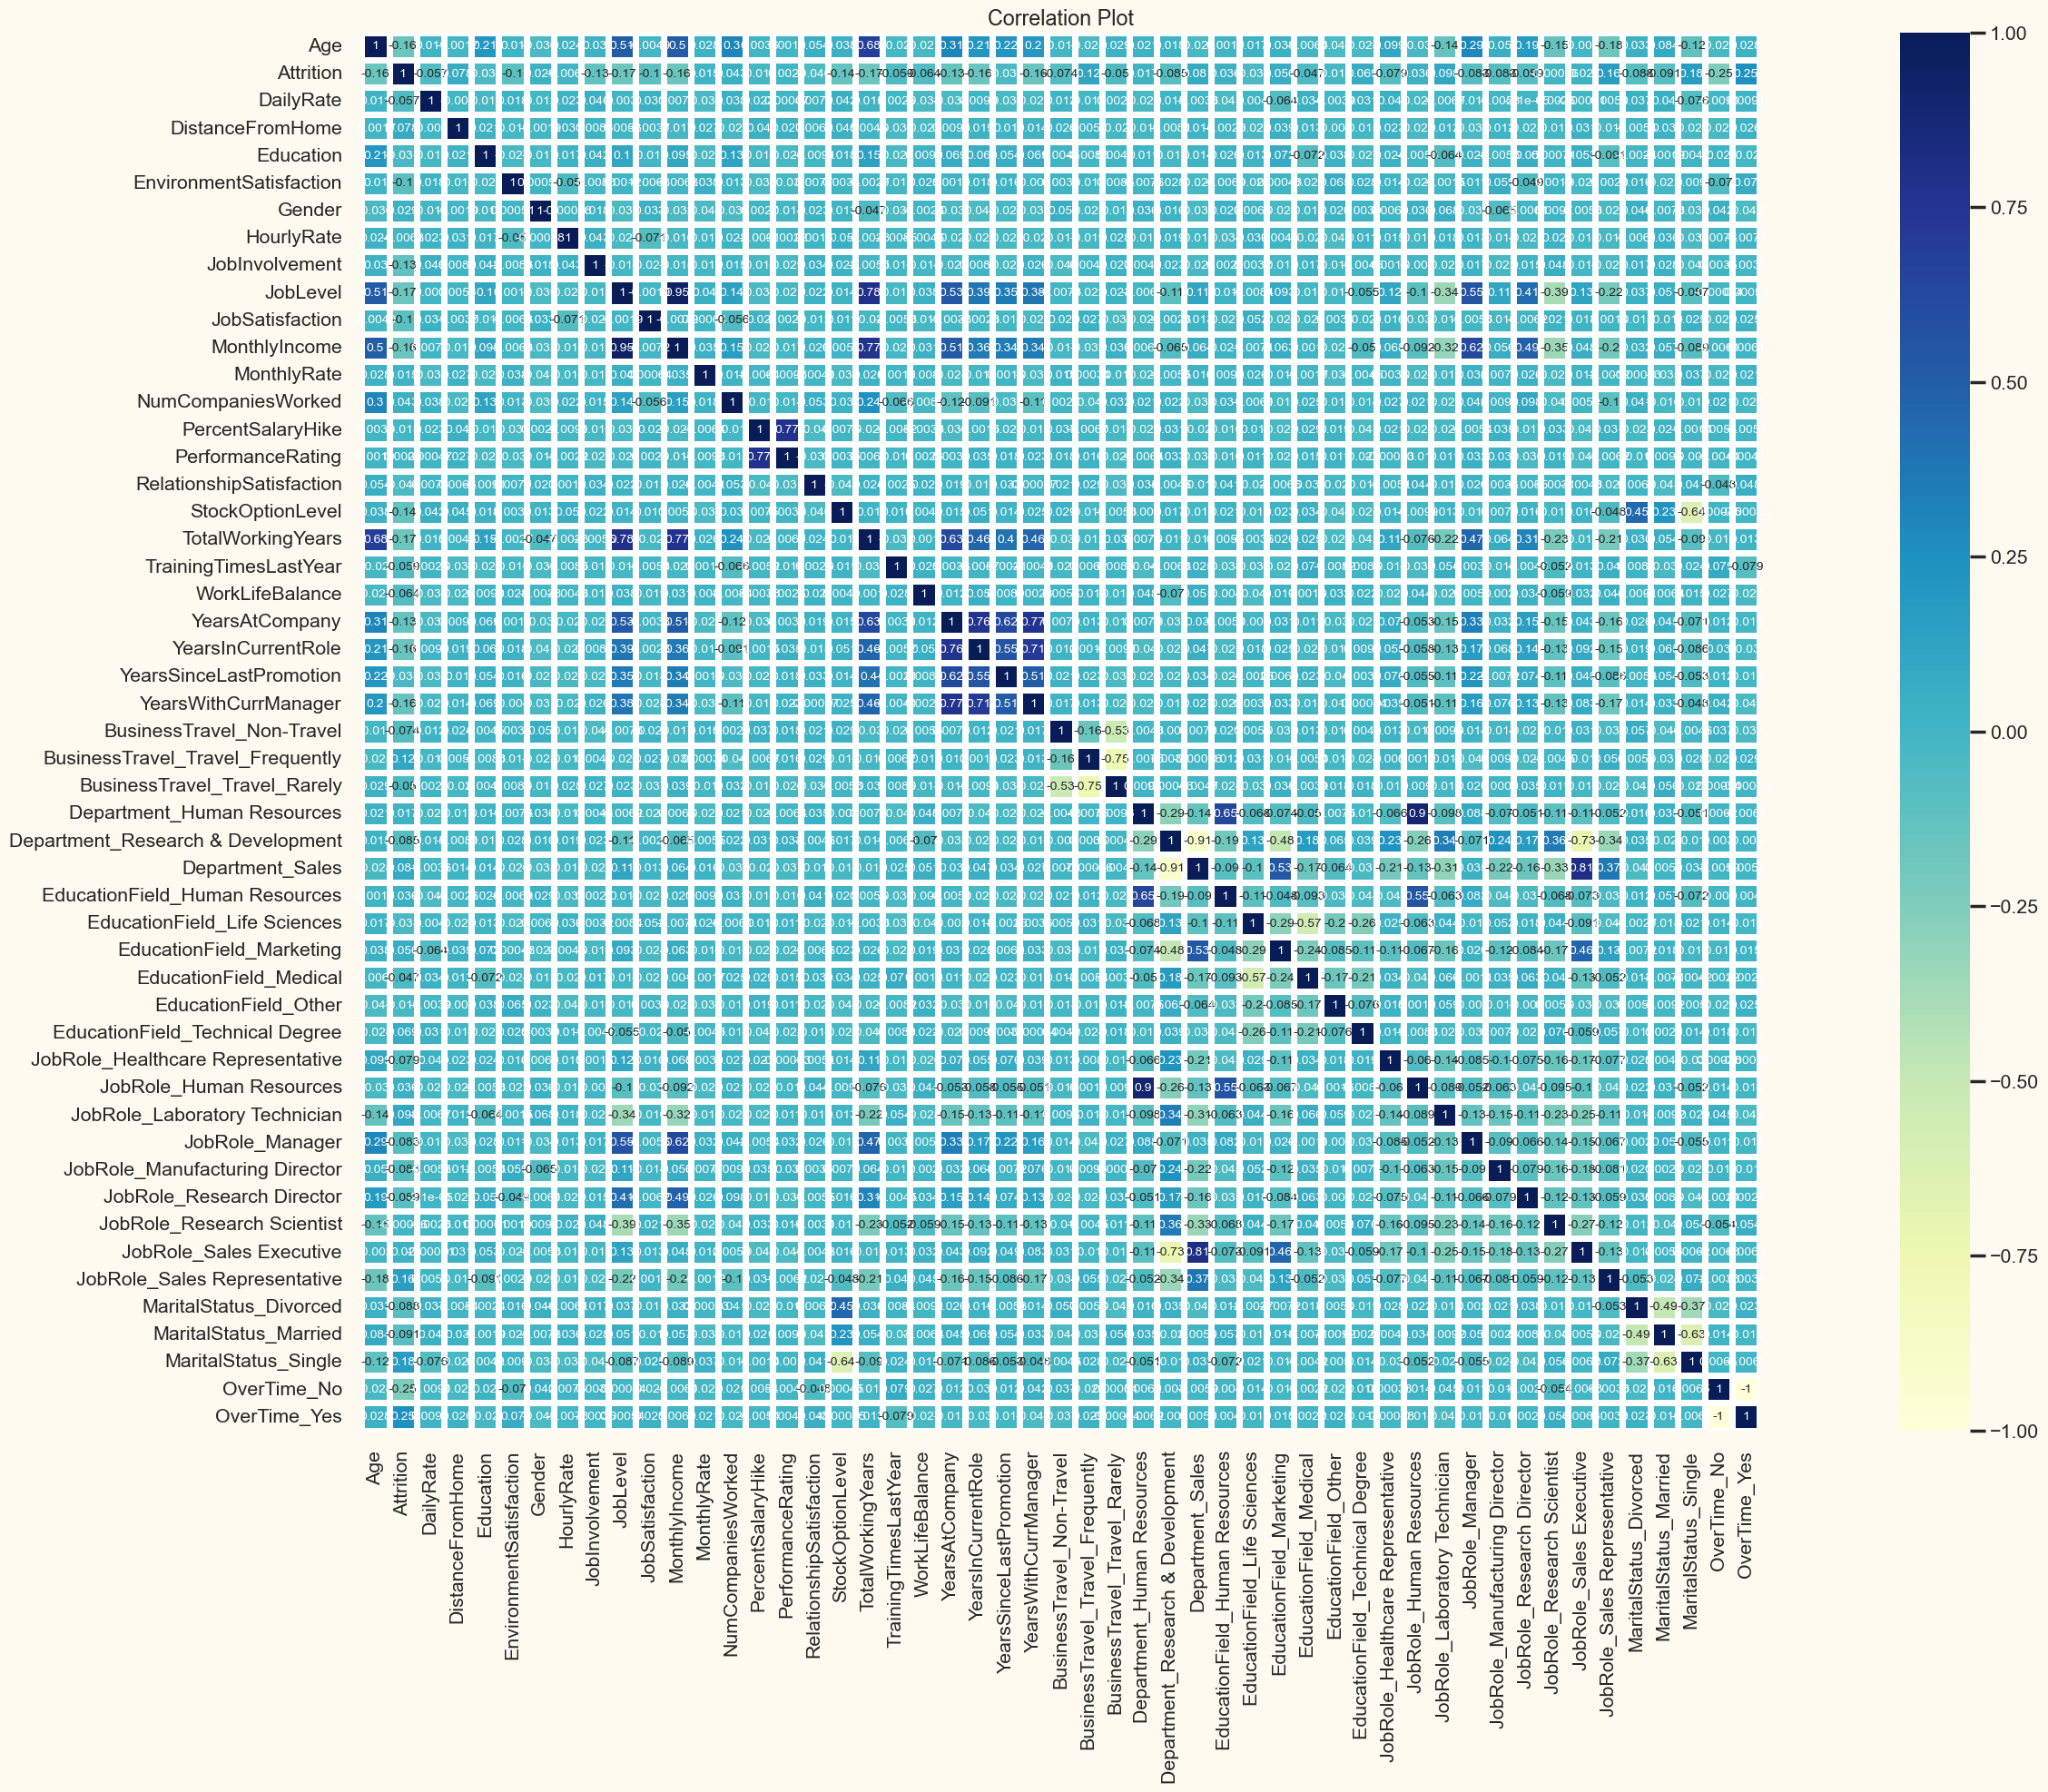

In [73]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(df.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

In [74]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")


Highly correlated features:
JobLevel and MonthlyIncome
JobLevel and TotalWorkingYears
MonthlyIncome and TotalWorkingYears
PercentSalaryHike and PerformanceRating
YearsAtCompany and YearsInCurrentRole
YearsAtCompany and YearsWithCurrManager
Department_Human Resources and JobRole_Human Resources
Department_Sales and JobRole_Sales Executive


In [75]:
# droping columns which are highly correlated

cols = ["JobLevel", "TotalWorkingYears", "PercentSalaryHike", "YearsInCurrentRole", "YearsWithCurrManager"]
df.drop(columns=cols, inplace=True)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Check for Imbalance in Dataset </div>

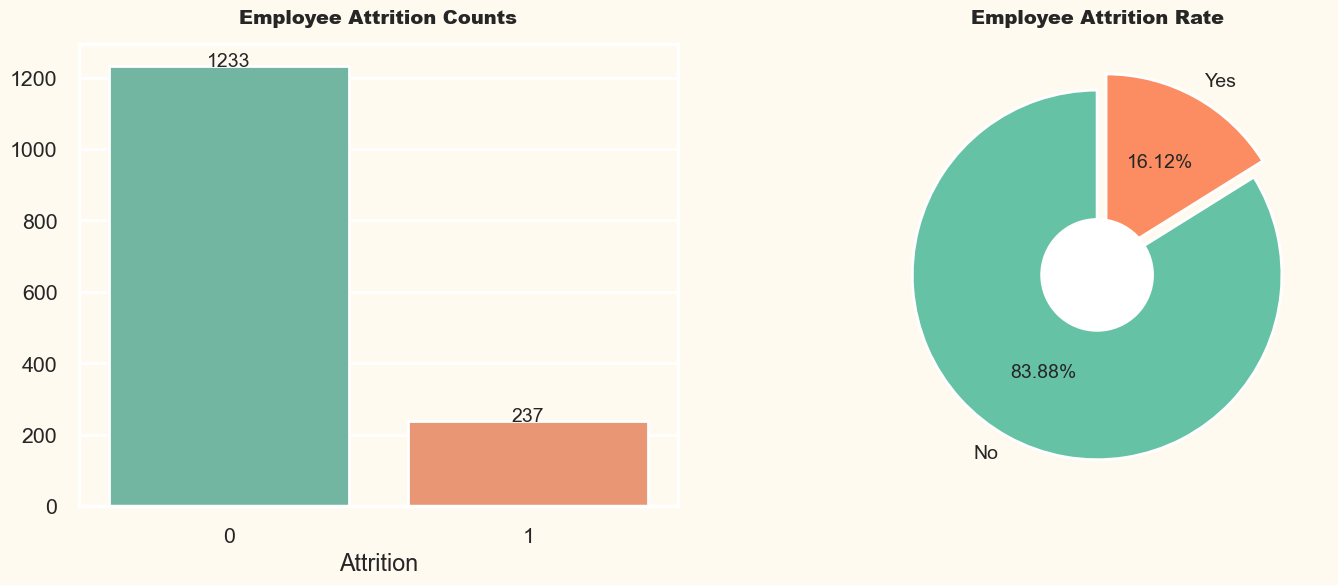

In [76]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = df["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2')
plt.title("Employee Attrition Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Dataset is Imbalance.  
* Need to Balance the dataset 

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Split the Data into Independent and Dependent Variable </div>

In [77]:
x = df.drop(['Attrition'], axis=1)
y = df[['Attrition']]

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Balance the Dataset using SMOTE </div>

In [78]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print("Before Smoote" , y.value_counts())
print()
print("After Smoote" , y_smote.value_counts())

Before Smoote Attrition
0            1233
1             237
Name: count, dtype: int64

After Smoote Attrition
0            1233
1            1233
Name: count, dtype: int64


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Feature Scaling </div>

In [79]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

In [80]:
x_scaled = scaler.fit_transform(x_smote)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Split the Data into Training and Test </div>

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Split the Data into Training and Test (UnScaled) </div>

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Split the Data into Training and Test (scaled) </div>

In [82]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled, y_smote, test_size=0.2, random_state=42)

In [85]:
# Machine learning algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
import os
from sklearn.base import ClassifierMixin
#from scikeras.wrappers import KerasClassifier


#for hypertuning
import optuna
from collections import Counter
from catboost import CatBoostError
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

# for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score # for Gini-mean
from sklearn.metrics import roc_curve

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Baseline Model Building </div>

In [83]:
training_score = []
testing_score = []
precission = []
recall = []
Roc_Auc_score = []
f1_score_ = []
kappa_score = []
G_Mean = []

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Model Building for Scaled Data </div>

In [85]:
training_score = []
testing_score = []
precission = []
recall = []
Roc_Auc_score = []
f1_score_ = []
kappa_score = []
G_Mean = []
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    y_test_prob1 = model.predict_proba(x_test1)[:, 1]
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    c = precision_score(y_test1,x_test_pred1)
    d = recall_score(y_test1,x_test_pred1)
    e = roc_auc_score(y_test1, y_test_prob1)
    f = f1_score(y_test1,x_test_pred1)
    g = cohen_kappa_score(y_test1, x_test_pred1)
    h = balanced_accuracy_score(y_test1,x_test_pred1)
    training_score.append(a)
    testing_score.append(b)
    precission.append(c)
    recall.append(d)
    Roc_Auc_score.append(e)
    f1_score_.append(f)
    kappa_score.append(g)
    G_Mean.append(h)
    
    
    print("\n------------------------------------------------------------------------")
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"ROC_AUC Score of {model} model is:", e)
    print(f"f1 Score of {model} model is:", f)
    print(f"kappa Score of {model} model is:", g)
    print(f"G_mean Score of {model} model is:", h)
 
    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test1,x_test_pred1))

    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()
    
    print("\n------------------------------------------------------------------------")
    print(f"ROC - AUC Curve of {model} model is:")
    y_pred_proba1 = model.predict_proba(x_test1)[:][:,1]
    fpr, tpr, thresholds = roc_curve(y_test1, y_pred_proba1)
    auc = roc_auc_score(y_test1, y_pred_proba1)

    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve",pad=20,fontweight="black")
    plt.legend()
    plt.show()

## Feature importance

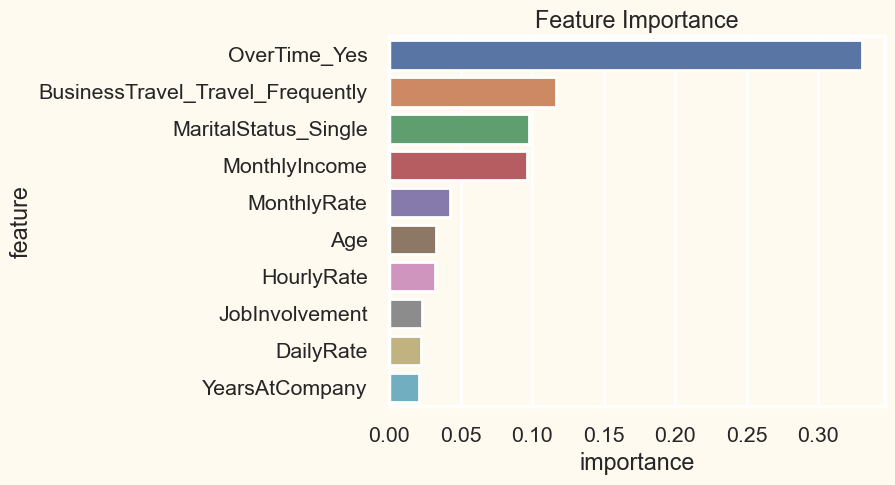

In [98]:

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train1,y_train1)
train_preds = model.predict(x_train1)
x_train1 = pd.DataFrame(x_train1, columns=x_train.columns)
model.feature_importances_
importance_df = pd.DataFrame({
    'feature': x_train1.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [ ]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)[:, 1]
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    c = precision_score(y_test,x_test_pred)
    d = recall_score(y_test,x_test_pred)
    e = roc_auc_score(y_test, y_test_prob)
    f = f1_score(y_test,x_test_pred)
    g = cohen_kappa_score(y_test, x_test_pred)
    h = balanced_accuracy_score(y_test,x_test_pred)
    training_score.append(a)
    testing_score.append(b)
    precission.append(c)
    recall.append(d)
    Roc_Auc_score.append(e)
    f1_score_.append(f)
    kappa_score.append(g)
    G_Mean.append(h)
    
    print("\n------------------------------------------------------------------------")
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"AUC Score of {model} model is:", e)
    
    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test, model.predict(x_test)))
    
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()
    
    print("\n------------------------------------------------------------------------")
    print(f"ROC - AUC Curve of {model} model is:")
    y_pred_proba = model.predict_proba(x_test)[:][:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve",pad=20,fontweight="black")
    plt.legend()
    plt.show()

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Logistic Regression Model </div>


------------------------------------------------------------------------
Accuracy_Score of LogisticRegression() model on Training Data is: 71.0446247464503
Accuracy_Score of LogisticRegression() model on Testing Data is: 70.04048582995951
Precision Score of LogisticRegression() model is: 0.6875
Recall Score of LogisticRegression() model is: 0.7213114754098361
AUC Score of LogisticRegression() model is: 0.7589999999999999

------------------------------------------------------------------------
Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       0.71      0.68      0.70       250
           1       0.69      0.72      0.70       244

    accuracy                           0.70       494
   macro avg       0.70      0.70      0.70       494
weighted avg       0.70      0.70      0.70       494


------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() mo

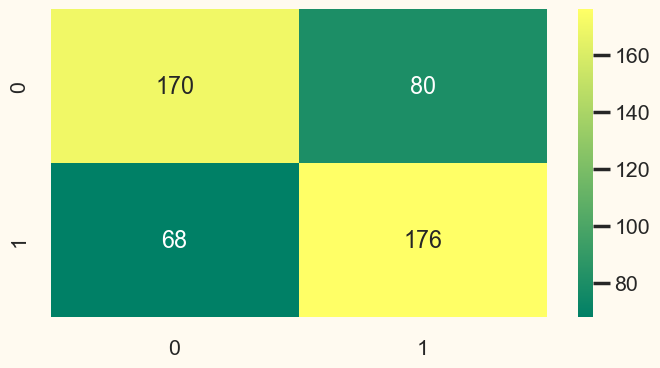


------------------------------------------------------------------------
ROC - AUC Curve of LogisticRegression() model is:


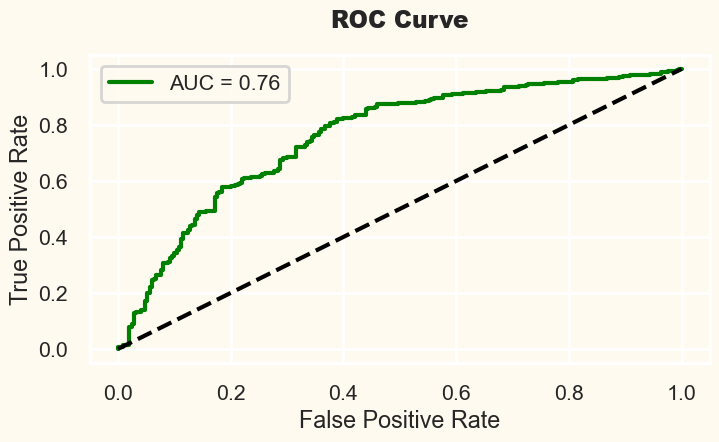

In [127]:
model_prediction(LogisticRegression())

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> K Nearest Neighbor (KNN) </div>


------------------------------------------------------------------------
Accuracy_Score of KNeighborsClassifier() model on Training Data is: 83.67139959432049
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 75.10121457489879
Precision Score of KNeighborsClassifier() model is: 0.692063492063492
Recall Score of KNeighborsClassifier() model is: 0.8934426229508197
AUC Score of KNeighborsClassifier() model is: 0.8417540983606557

------------------------------------------------------------------------
Classification Report of KNeighborsClassifier() model is:
              precision    recall  f1-score   support

           0       0.85      0.61      0.71       250
           1       0.69      0.89      0.78       244

    accuracy                           0.75       494
   macro avg       0.77      0.75      0.75       494
weighted avg       0.77      0.75      0.75       494


------------------------------------------------------------------------
Confusion Matrix of

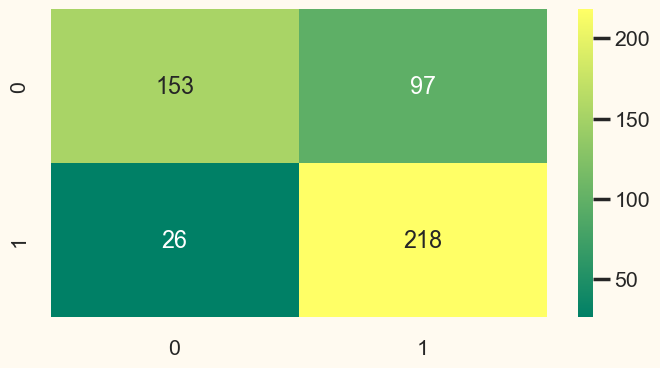


------------------------------------------------------------------------
ROC - AUC Curve of KNeighborsClassifier() model is:


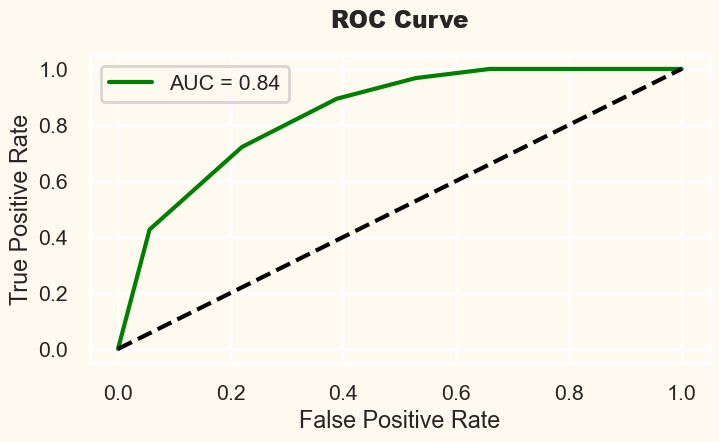

In [128]:
model_prediction(KNeighborsClassifier())

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Naive Bayes </div>


------------------------------------------------------------------------
Accuracy_Score of GaussianNB() model on Training Data is: 77.89046653144015
Accuracy_Score of GaussianNB() model on Testing Data is: 78.34008097165992
Precision Score of GaussianNB() model is: 0.7202572347266881
Recall Score of GaussianNB() model is: 0.9180327868852459
AUC Score of GaussianNB() model is: 0.902311475409836

------------------------------------------------------------------------
Classification Report of GaussianNB() model is:
              precision    recall  f1-score   support

           0       0.89      0.65      0.75       250
           1       0.72      0.92      0.81       244

    accuracy                           0.78       494
   macro avg       0.81      0.79      0.78       494
weighted avg       0.81      0.78      0.78       494


------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


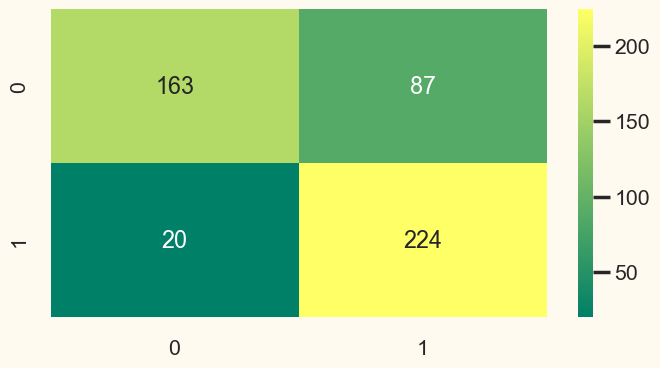


------------------------------------------------------------------------
ROC - AUC Curve of GaussianNB() model is:


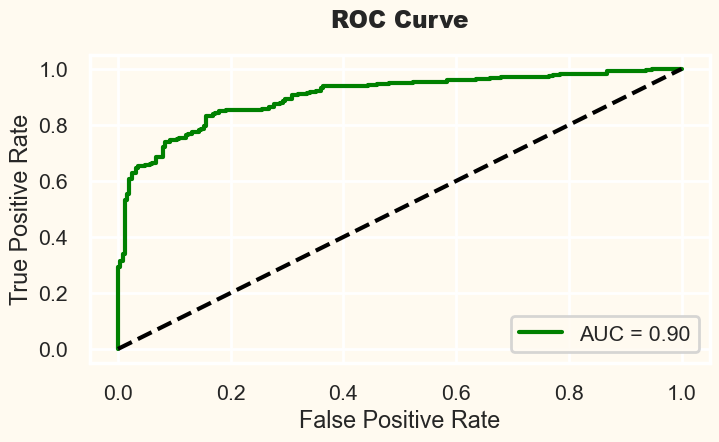

In [129]:
model_prediction(GaussianNB())

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Model Building for Unscaled Data </div>

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Decision Tree </div>


------------------------------------------------------------------------
Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 86.63967611336032
Precision Score of DecisionTreeClassifier() model is: 0.8396946564885496
Recall Score of DecisionTreeClassifier() model is: 0.9016393442622951
AUC Score of DecisionTreeClassifier() model is: 0.8668196721311474

------------------------------------------------------------------------
Classification Report of DecisionTreeClassifier() model is:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       250
           1       0.84      0.90      0.87       244

    accuracy                           0.87       494
   macro avg       0.87      0.87      0.87       494
weighted avg       0.87      0.87      0.87       494


------------------------------------------------------------------------
Confusion Matrix o

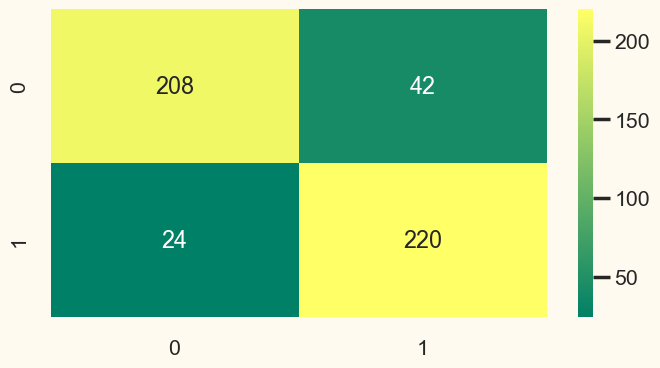


------------------------------------------------------------------------
ROC - AUC Curve of DecisionTreeClassifier() model is:


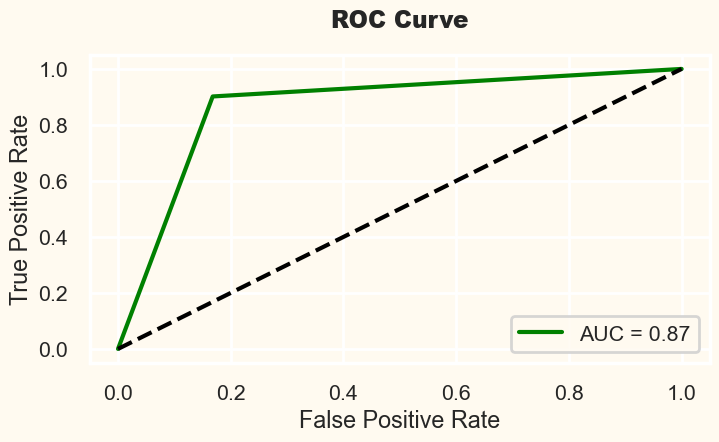

In [130]:
model_prediction(DecisionTreeClassifier())

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Random Forest </div>


------------------------------------------------------------------------
Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 93.11740890688259
Precision Score of RandomForestClassifier() model is: 0.9646017699115044
Recall Score of RandomForestClassifier() model is: 0.8934426229508197
AUC Score of RandomForestClassifier() model is: 0.9813442622950821

------------------------------------------------------------------------
Classification Report of RandomForestClassifier() model is:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       250
           1       0.96      0.89      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494


------------------------------------------------------------------------
Confusion Matrix o

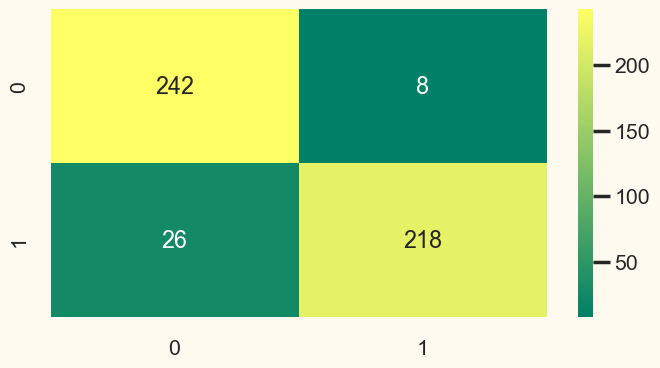


------------------------------------------------------------------------
ROC - AUC Curve of RandomForestClassifier() model is:


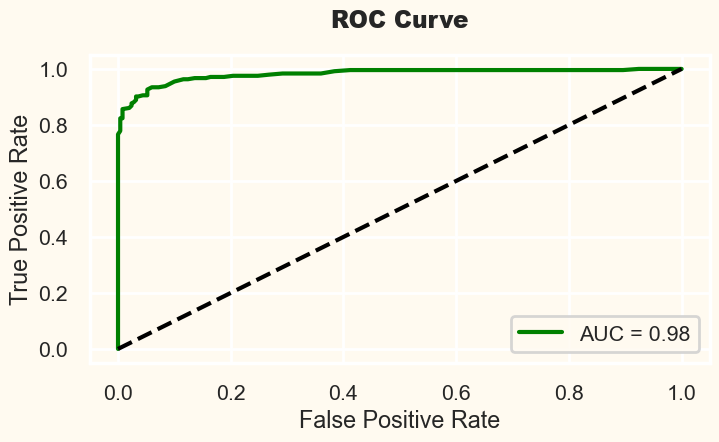

In [91]:
model_prediction(RandomForestClassifier())

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Ada Boost </div>


------------------------------------------------------------------------
Accuracy_Score of AdaBoostClassifier() model on Training Data is: 93.20486815415822
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 91.29554655870446
Precision Score of AdaBoostClassifier() model is: 0.9240506329113924
Recall Score of AdaBoostClassifier() model is: 0.8975409836065574
AUC Score of AdaBoostClassifier() model is: 0.958327868852459

------------------------------------------------------------------------
Classification Report of AdaBoostClassifier() model is:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       250
           1       0.92      0.90      0.91       244

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494


------------------------------------------------------------------------
Confusion Matrix of AdaBoostCla

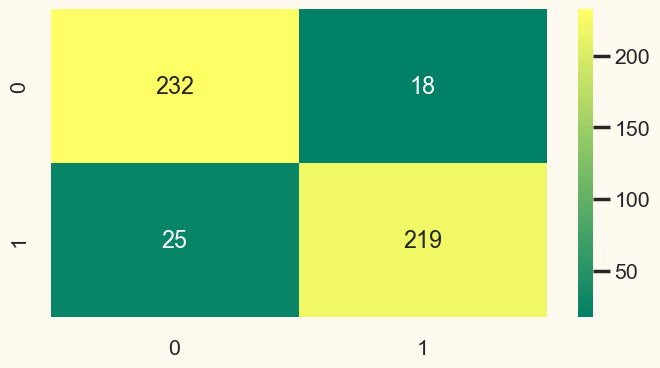


------------------------------------------------------------------------
ROC - AUC Curve of AdaBoostClassifier() model is:


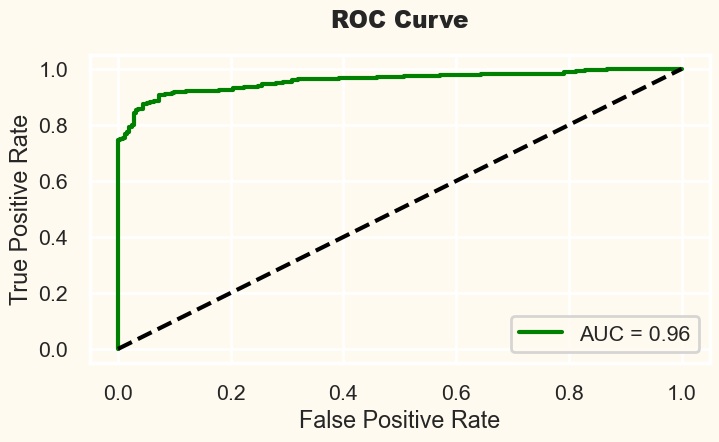

In [92]:
model_prediction(AdaBoostClassifier())

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Gradient Boosting </div>


------------------------------------------------------------------------
Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 96.50101419878297
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 92.51012145748987
Precision Score of GradientBoostingClassifier() model is: 0.9559471365638766
Recall Score of GradientBoostingClassifier() model is: 0.889344262295082
AUC Score of GradientBoostingClassifier() model is: 0.9669016393442623

------------------------------------------------------------------------
Classification Report of GradientBoostingClassifier() model is:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       250
           1       0.96      0.89      0.92       244

    accuracy                           0.93       494
   macro avg       0.93      0.92      0.92       494
weighted avg       0.93      0.93      0.92       494


--------------------------------------------------------

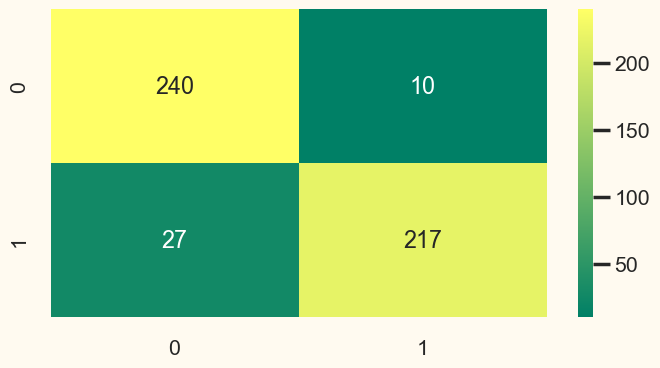


------------------------------------------------------------------------
ROC - AUC Curve of GradientBoostingClassifier() model is:


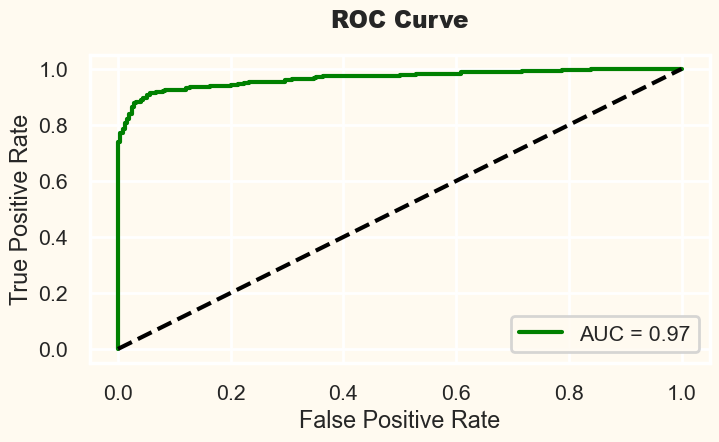

In [93]:
model_prediction(GradientBoostingClassifier())

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> XG Boost </div>


------------------------------------------------------------------------
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model on Training Data is: 100.0
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, 

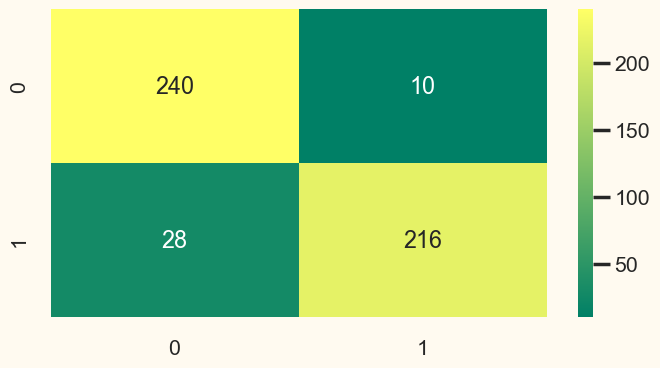


------------------------------------------------------------------------
ROC - AUC Curve of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model is:


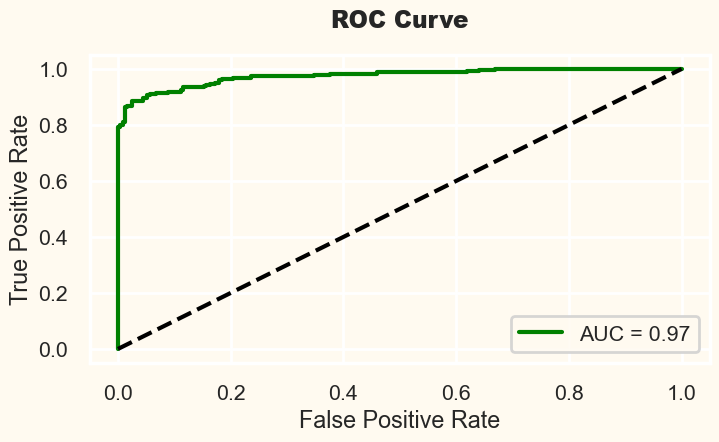

In [94]:
model_prediction(XGBClassifier())

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> CatBoost  </div>

Learning rate set to 0.013768
0:	learn: 0.6813275	total: 186ms	remaining: 3m 5s
1:	learn: 0.6681845	total: 195ms	remaining: 1m 37s
2:	learn: 0.6562548	total: 203ms	remaining: 1m 7s
3:	learn: 0.6474583	total: 212ms	remaining: 52.9s
4:	learn: 0.6369930	total: 220ms	remaining: 43.9s
5:	learn: 0.6262593	total: 229ms	remaining: 37.9s
6:	learn: 0.6168966	total: 237ms	remaining: 33.6s
7:	learn: 0.6073071	total: 245ms	remaining: 30.4s
8:	learn: 0.5975972	total: 254ms	remaining: 27.9s
9:	learn: 0.5859035	total: 262ms	remaining: 25.9s
10:	learn: 0.5756341	total: 270ms	remaining: 24.3s
11:	learn: 0.5676244	total: 278ms	remaining: 22.9s
12:	learn: 0.5585886	total: 286ms	remaining: 21.7s
13:	learn: 0.5509483	total: 294ms	remaining: 20.7s
14:	learn: 0.5408298	total: 303ms	remaining: 19.9s
15:	learn: 0.5324298	total: 311ms	remaining: 19.1s
16:	learn: 0.5254218	total: 319ms	remaining: 18.4s
17:	learn: 0.5188983	total: 327ms	remaining: 17.9s
18:	learn: 0.5117677	total: 335ms	remaining: 17.3s
19:	learn:

182:	learn: 0.2144614	total: 1.89s	remaining: 8.43s
183:	learn: 0.2139864	total: 1.9s	remaining: 8.41s
184:	learn: 0.2136189	total: 1.91s	remaining: 8.4s
185:	learn: 0.2131168	total: 1.92s	remaining: 8.38s
186:	learn: 0.2126025	total: 1.92s	remaining: 8.37s
187:	learn: 0.2120481	total: 1.94s	remaining: 8.36s
188:	learn: 0.2115182	total: 1.95s	remaining: 8.35s
189:	learn: 0.2108775	total: 1.95s	remaining: 8.33s
190:	learn: 0.2103321	total: 1.96s	remaining: 8.32s
191:	learn: 0.2098259	total: 1.97s	remaining: 8.31s
192:	learn: 0.2095404	total: 1.99s	remaining: 8.3s
193:	learn: 0.2092097	total: 1.99s	remaining: 8.29s
194:	learn: 0.2086328	total: 2s	remaining: 8.27s
195:	learn: 0.2083268	total: 2.01s	remaining: 8.25s
196:	learn: 0.2078669	total: 2.02s	remaining: 8.23s
197:	learn: 0.2074682	total: 2.03s	remaining: 8.22s
198:	learn: 0.2069585	total: 2.04s	remaining: 8.2s
199:	learn: 0.2066026	total: 2.04s	remaining: 8.18s
200:	learn: 0.2062387	total: 2.05s	remaining: 8.17s
201:	learn: 0.20586

360:	learn: 0.1541796	total: 3.56s	remaining: 6.3s
361:	learn: 0.1539174	total: 3.56s	remaining: 6.28s
362:	learn: 0.1536720	total: 3.58s	remaining: 6.28s
363:	learn: 0.1533058	total: 3.58s	remaining: 6.26s
364:	learn: 0.1530985	total: 3.59s	remaining: 6.25s
365:	learn: 0.1528972	total: 3.6s	remaining: 6.24s
366:	learn: 0.1525935	total: 3.61s	remaining: 6.23s
367:	learn: 0.1524206	total: 3.62s	remaining: 6.21s
368:	learn: 0.1522803	total: 3.63s	remaining: 6.2s
369:	learn: 0.1520756	total: 3.63s	remaining: 6.19s
370:	learn: 0.1519643	total: 3.64s	remaining: 6.18s
371:	learn: 0.1518416	total: 3.65s	remaining: 6.16s
372:	learn: 0.1515437	total: 3.66s	remaining: 6.15s
373:	learn: 0.1513549	total: 3.67s	remaining: 6.14s
374:	learn: 0.1511890	total: 3.68s	remaining: 6.13s
375:	learn: 0.1510548	total: 3.68s	remaining: 6.11s
376:	learn: 0.1506028	total: 3.69s	remaining: 6.1s
377:	learn: 0.1504784	total: 3.7s	remaining: 6.09s
378:	learn: 0.1502311	total: 3.71s	remaining: 6.08s
379:	learn: 0.150

529:	learn: 0.1202936	total: 5s	remaining: 4.43s
530:	learn: 0.1200709	total: 5.01s	remaining: 4.42s
531:	learn: 0.1199159	total: 5.02s	remaining: 4.42s
532:	learn: 0.1197249	total: 5.03s	remaining: 4.4s
533:	learn: 0.1195830	total: 5.03s	remaining: 4.39s
534:	learn: 0.1194241	total: 5.04s	remaining: 4.38s
535:	learn: 0.1192284	total: 5.05s	remaining: 4.37s
536:	learn: 0.1189906	total: 5.06s	remaining: 4.36s
537:	learn: 0.1187693	total: 5.07s	remaining: 4.35s
538:	learn: 0.1185558	total: 5.08s	remaining: 4.34s
539:	learn: 0.1183735	total: 5.08s	remaining: 4.33s
540:	learn: 0.1182587	total: 5.09s	remaining: 4.32s
541:	learn: 0.1179947	total: 5.1s	remaining: 4.31s
542:	learn: 0.1178677	total: 5.11s	remaining: 4.3s
543:	learn: 0.1177248	total: 5.12s	remaining: 4.29s
544:	learn: 0.1175284	total: 5.12s	remaining: 4.28s
545:	learn: 0.1173205	total: 5.13s	remaining: 4.27s
546:	learn: 0.1171745	total: 5.14s	remaining: 4.26s
547:	learn: 0.1170078	total: 5.15s	remaining: 4.25s
548:	learn: 0.1169

706:	learn: 0.0927117	total: 6.47s	remaining: 2.68s
707:	learn: 0.0925254	total: 6.48s	remaining: 2.67s
708:	learn: 0.0924122	total: 6.49s	remaining: 2.66s
709:	learn: 0.0923504	total: 6.5s	remaining: 2.65s
710:	learn: 0.0922532	total: 6.5s	remaining: 2.64s
711:	learn: 0.0920520	total: 6.51s	remaining: 2.63s
712:	learn: 0.0918644	total: 6.52s	remaining: 2.62s
713:	learn: 0.0917126	total: 6.53s	remaining: 2.62s
714:	learn: 0.0916615	total: 6.54s	remaining: 2.6s
715:	learn: 0.0915096	total: 6.54s	remaining: 2.6s
716:	learn: 0.0912681	total: 6.55s	remaining: 2.59s
717:	learn: 0.0911308	total: 6.56s	remaining: 2.58s
718:	learn: 0.0909670	total: 6.57s	remaining: 2.57s
719:	learn: 0.0908683	total: 6.58s	remaining: 2.56s
720:	learn: 0.0907051	total: 6.58s	remaining: 2.55s
721:	learn: 0.0906450	total: 6.59s	remaining: 2.54s
722:	learn: 0.0904891	total: 6.6s	remaining: 2.53s
723:	learn: 0.0902815	total: 6.61s	remaining: 2.52s
724:	learn: 0.0901570	total: 6.62s	remaining: 2.51s
725:	learn: 0.090

876:	learn: 0.0723903	total: 7.94s	remaining: 1.11s
877:	learn: 0.0723112	total: 7.95s	remaining: 1.1s
878:	learn: 0.0721316	total: 7.96s	remaining: 1.09s
879:	learn: 0.0720155	total: 7.96s	remaining: 1.08s
880:	learn: 0.0719351	total: 7.97s	remaining: 1.08s
881:	learn: 0.0718497	total: 7.98s	remaining: 1.07s
882:	learn: 0.0716790	total: 7.99s	remaining: 1.06s
883:	learn: 0.0715530	total: 8s	remaining: 1.05s
884:	learn: 0.0714307	total: 8s	remaining: 1.04s
885:	learn: 0.0713470	total: 8.01s	remaining: 1.03s
886:	learn: 0.0711984	total: 8.02s	remaining: 1.02s
887:	learn: 0.0711256	total: 8.03s	remaining: 1.01s
888:	learn: 0.0710536	total: 8.04s	remaining: 1s
889:	learn: 0.0709805	total: 8.04s	remaining: 994ms
890:	learn: 0.0708543	total: 8.05s	remaining: 985ms
891:	learn: 0.0707854	total: 8.06s	remaining: 976ms
892:	learn: 0.0706845	total: 8.07s	remaining: 967ms
893:	learn: 0.0706301	total: 8.08s	remaining: 958ms
894:	learn: 0.0704795	total: 8.09s	remaining: 949ms
895:	learn: 0.0704033	

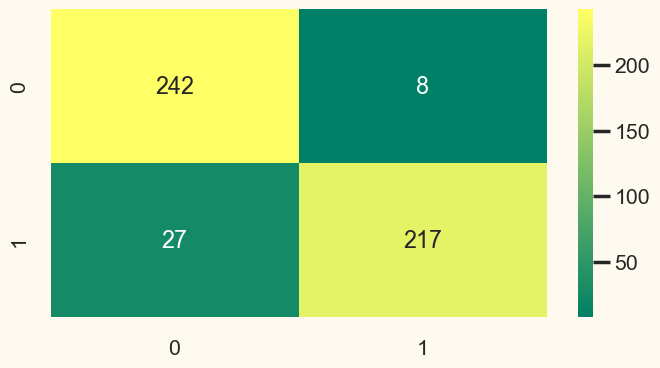


------------------------------------------------------------------------
ROC - AUC Curve of <catboost.core.CatBoostClassifier object at 0x00000221ABBDD4D0> model is:


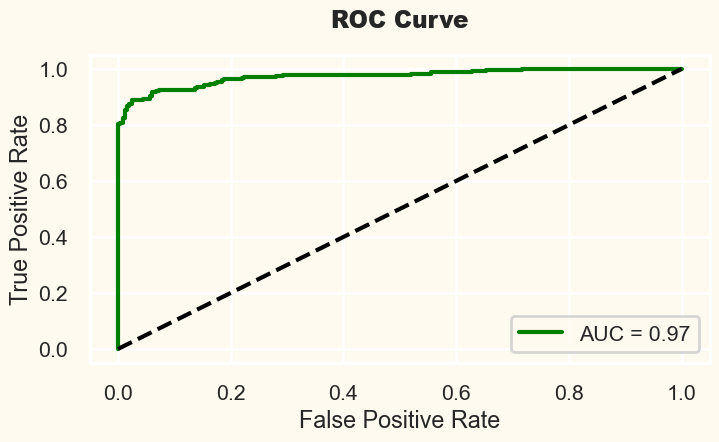

In [95]:
model_prediction(CatBoostClassifier())

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> LgbmClassifier  </div>

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 989, number of negative: 983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4198
[LightGBM] [Info] Number of data points in the train set: 1972, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501521 -> initscore=0.006085
[LightGBM] [Info] Start training from score 0.006085

------------------------------------------------------------------------
Accuracy_Score of LGBMClassifier() model on Training Data is: 100.0
Accuracy_Score of LGBMClassifier() model on Testing Data is: 92.51012145748987
Precision Score of LGBMClassifier() model is: 0.9559471365638766
Recall Score of LGBMClassifier() model is: 0.889344262295082
AUC Score of LGBMClass

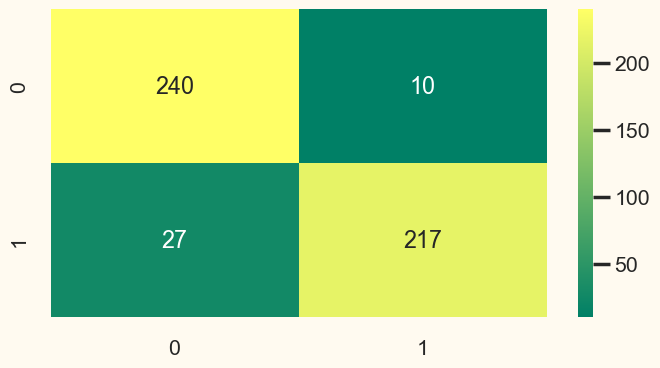


------------------------------------------------------------------------
ROC - AUC Curve of LGBMClassifier() model is:


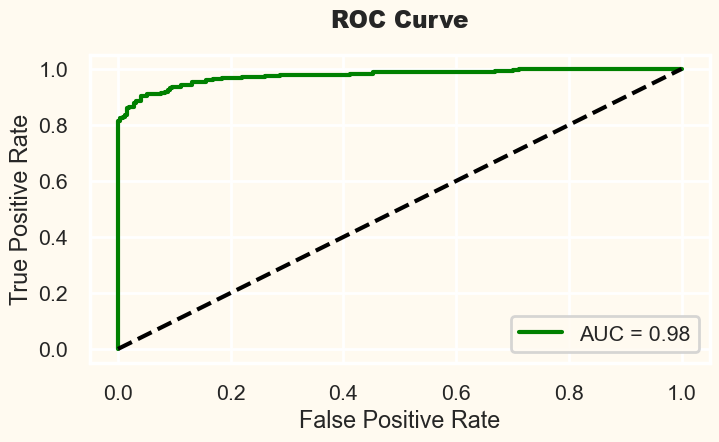

In [96]:
model_prediction(LGBMClassifier())

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Creating a DataFrame for Storing Result </div>

In [97]:
models = ["Logistic Regression","KNN","Naive Bayes","Decision Tree","Random Forest","Ada Boost",
          "Gradient Boost","XGBoost","CatBoost","LGBM classifier"]

In [98]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score,
                   "Precision": precission,
                   "Recall": recall,
                   "ROC_AUC Score": Roc_Auc_score,
                   "f1_Score": f1_score_,
                   "Kappa_Score": kappa_score,
                   "G_Mean": G_Mean})
df

Algorithms  Training Score  Testing Score  Precision    Recall  \
0  Logistic Regression       85.801217      86.437247   0.861224  0.864754   
1                  KNN       91.632860      89.271255   0.828179  0.987705   
2          Naive Bayes       76.369168      76.720648   0.717172  0.872951   
3        Decision Tree      100.000000      86.639676   0.856000  0.877049   
4        Random Forest      100.000000      93.117409   0.964602  0.893443   
5            Ada Boost       93.204868      91.295547   0.924051  0.897541   
6       Gradient Boost       96.501014      92.510121   0.955947  0.889344   
7              XGBoost      100.000000      92.307692   0.955752  0.885246   
8             CatBoost       99.594320      92.914980   0.964444  0.889344   
9      LGBM classifier      100.000000      92.510121   0.955947  0.889344   

   ROC_AUC Score  f1_Score  Kappa_Score    G_Mean  
0       0.925328  0.862986     0.728718  0.864377  
1       0.965361  0.900935     0.785888  0.893852  
2       0.873934  0.787431     0.535555  0.768475  
3       0.866525  0.866397     0.732833  0.866525  
4       0.981344  0.927660     0.862206  0.930721  
5       0.958328  0.910603     0.825825  0.912770  
6       0.966902  0.921444     0.850055  0.924672  
7       0.974672  0.919149     0.845995  0.922623  
8       0.973820  0.925373     0.858146  0.928672  
9       0.975689  0.921444     0.850055  0.924672

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

*  Adaboost, Gradient Boosting & CatBoost Model are having High Test Accuracy and AUC Score.

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Hypertuning  Selected Models </div>

### Optimising Catboost

In [99]:
'''def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 10, 2000, log=True),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 100, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.1, 20.0, log=True),
        'random_strength': trial.suggest_float('random_strength', 1.0, 2.0),
        'depth': trial.suggest_int('depth', 1, 10),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 300),
        'task_type': 'GPU',
        'random_seed': 1,
        'verbose': False
    }

    try:
        cb = CatBoostClassifier(**params)

        # Train the model
        cb.fit(x_train, y_train, eval_set=(x_test, y_test), early_stopping_rounds=50, verbose=100)

        # Make the predictions
        y_pred = cb.predict(x_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        return accuracy
    except CatBoostError as e:
        # Handle CatBoostError by returning a low accuracy
        print(f"Trial {trial.number} failed with CatBoostError: {e}")
        return 0.0  # You can adjust this value based on your preference

# Create the Optuna study
study_catboost = optuna.create_study(direction='maximize')
study_catboost.optimize(objective, n_trials=30)

# Print the best hyperparameters and test accuracy
print('Best hyperparameters:', study_catboost.best_params)
print('Best Test Accuracy:', study_catboost.best_value)
'''

'def objective(trial):\n    params = {\n        \'iterations\': trial.suggest_int(\'iterations\', 10, 2000, log=True),\n        \'learning_rate\': trial.suggest_float(\'learning_rate\', 0.01, 1.0, log=True),\n        \'l2_leaf_reg\': trial.suggest_float(\'l2_leaf_reg\', 1, 100, log=True),\n        \'bagging_temperature\': trial.suggest_float(\'bagging_temperature\', 0.1, 20.0, log=True),\n        \'random_strength\': trial.suggest_float(\'random_strength\', 1.0, 2.0),\n        \'depth\': trial.suggest_int(\'depth\', 1, 10),\n        \'min_data_in_leaf\': trial.suggest_int(\'min_data_in_leaf\', 1, 300),\n        \'task_type\': \'GPU\',\n        \'random_seed\': 1,\n        \'verbose\': False\n    }\n\n    try:\n        cb = CatBoostClassifier(**params)\n\n        # Train the model\n        cb.fit(x_train, y_train, eval_set=(x_test, y_test), early_stopping_rounds=50, verbose=100)\n\n        # Make the predictions\n        y_pred = cb.predict(x_test)\n\n        # Calculate accuracy\n     

In [100]:
catboost_Best_hyperparameters = {'iterations': 651, 'learning_rate': 0.03356857796503744, 'l2_leaf_reg': 8.68165684728472, 'bagging_temperature': 7.120978423676909, 'random_strength': 1.9940130782713084, 'depth': 7, 'min_data_in_leaf': 122}

0:	learn: 0.6723369	total: 16.1ms	remaining: 10.5s
1:	learn: 0.6513016	total: 29.8ms	remaining: 9.66s
2:	learn: 0.6330425	total: 43.2ms	remaining: 9.34s
3:	learn: 0.6154115	total: 56.9ms	remaining: 9.2s
4:	learn: 0.5958019	total: 70.1ms	remaining: 9.05s
5:	learn: 0.5781775	total: 83.3ms	remaining: 8.95s
6:	learn: 0.5612949	total: 114ms	remaining: 10.5s
7:	learn: 0.5458919	total: 186ms	remaining: 15s
8:	learn: 0.5323990	total: 220ms	remaining: 15.7s
9:	learn: 0.5183115	total: 237ms	remaining: 15.2s
10:	learn: 0.5069920	total: 253ms	remaining: 14.7s
11:	learn: 0.4961832	total: 270ms	remaining: 14.4s
12:	learn: 0.4848134	total: 289ms	remaining: 14.2s
13:	learn: 0.4715809	total: 306ms	remaining: 13.9s
14:	learn: 0.4622450	total: 319ms	remaining: 13.5s
15:	learn: 0.4539187	total: 332ms	remaining: 13.2s
16:	learn: 0.4447820	total: 345ms	remaining: 12.9s
17:	learn: 0.4372267	total: 357ms	remaining: 12.6s
18:	learn: 0.4295164	total: 369ms	remaining: 12.3s
19:	learn: 0.4212164	total: 383ms	rema

161:	learn: 0.1619229	total: 2.33s	remaining: 7.05s
162:	learn: 0.1613149	total: 2.35s	remaining: 7.03s
163:	learn: 0.1608446	total: 2.36s	remaining: 7.01s
164:	learn: 0.1603274	total: 2.37s	remaining: 6.99s
165:	learn: 0.1599617	total: 2.38s	remaining: 6.97s
166:	learn: 0.1593027	total: 2.4s	remaining: 6.95s
167:	learn: 0.1585644	total: 2.41s	remaining: 6.94s
168:	learn: 0.1582190	total: 2.43s	remaining: 6.93s
169:	learn: 0.1576026	total: 2.46s	remaining: 6.97s
170:	learn: 0.1570297	total: 2.48s	remaining: 6.97s
171:	learn: 0.1564734	total: 2.5s	remaining: 6.97s
172:	learn: 0.1560946	total: 2.52s	remaining: 6.95s
173:	learn: 0.1556696	total: 2.53s	remaining: 6.93s
174:	learn: 0.1552247	total: 2.54s	remaining: 6.91s
175:	learn: 0.1547302	total: 2.56s	remaining: 6.9s
176:	learn: 0.1543827	total: 2.57s	remaining: 6.88s
177:	learn: 0.1537730	total: 2.58s	remaining: 6.86s
178:	learn: 0.1531206	total: 2.59s	remaining: 6.84s
179:	learn: 0.1524588	total: 2.6s	remaining: 6.82s
180:	learn: 0.15

331:	learn: 0.0948011	total: 4.67s	remaining: 4.49s
332:	learn: 0.0944104	total: 4.69s	remaining: 4.48s
333:	learn: 0.0940318	total: 4.71s	remaining: 4.47s
334:	learn: 0.0938881	total: 4.72s	remaining: 4.46s
335:	learn: 0.0933212	total: 4.74s	remaining: 4.44s
336:	learn: 0.0930461	total: 4.75s	remaining: 4.43s
337:	learn: 0.0928247	total: 4.77s	remaining: 4.42s
338:	learn: 0.0924880	total: 4.78s	remaining: 4.4s
339:	learn: 0.0923271	total: 4.79s	remaining: 4.38s
340:	learn: 0.0918800	total: 4.81s	remaining: 4.37s
341:	learn: 0.0916196	total: 4.82s	remaining: 4.36s
342:	learn: 0.0913759	total: 4.83s	remaining: 4.34s
343:	learn: 0.0909815	total: 4.85s	remaining: 4.33s
344:	learn: 0.0908313	total: 4.86s	remaining: 4.31s
345:	learn: 0.0904564	total: 4.87s	remaining: 4.3s
346:	learn: 0.0903928	total: 4.88s	remaining: 4.28s
347:	learn: 0.0900483	total: 4.9s	remaining: 4.26s
348:	learn: 0.0899583	total: 4.91s	remaining: 4.25s
349:	learn: 0.0899272	total: 4.92s	remaining: 4.23s
350:	learn: 0.0

495:	learn: 0.0586626	total: 6.78s	remaining: 2.12s
496:	learn: 0.0584887	total: 6.79s	remaining: 2.1s
497:	learn: 0.0582718	total: 6.8s	remaining: 2.09s
498:	learn: 0.0580507	total: 6.82s	remaining: 2.08s
499:	learn: 0.0579083	total: 6.83s	remaining: 2.06s
500:	learn: 0.0577111	total: 6.84s	remaining: 2.05s
501:	learn: 0.0574858	total: 6.85s	remaining: 2.03s
502:	learn: 0.0573124	total: 6.87s	remaining: 2.02s
503:	learn: 0.0570522	total: 6.88s	remaining: 2.01s
504:	learn: 0.0569305	total: 6.89s	remaining: 1.99s
505:	learn: 0.0566926	total: 6.9s	remaining: 1.98s
506:	learn: 0.0565546	total: 6.92s	remaining: 1.96s
507:	learn: 0.0563781	total: 6.93s	remaining: 1.95s
508:	learn: 0.0561772	total: 6.94s	remaining: 1.94s
509:	learn: 0.0559654	total: 6.95s	remaining: 1.92s
510:	learn: 0.0558301	total: 6.97s	remaining: 1.91s
511:	learn: 0.0557017	total: 6.98s	remaining: 1.9s
512:	learn: 0.0555790	total: 6.99s	remaining: 1.88s
513:	learn: 0.0554329	total: 7s	remaining: 1.87s
514:	learn: 0.05523

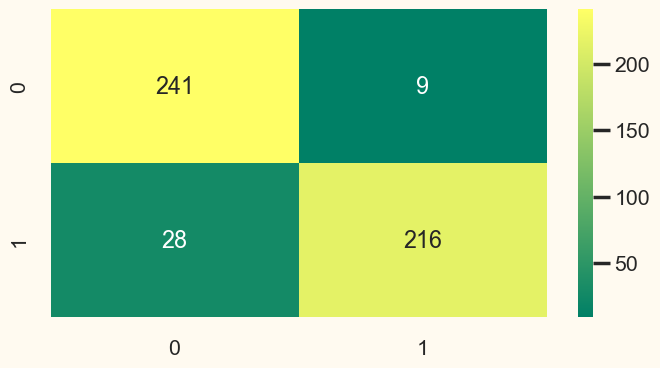


------------------------------------------------------------------------
ROC - AUC Curve of <catboost.core.CatBoostClassifier object at 0x00000221AC2F0890> model is:


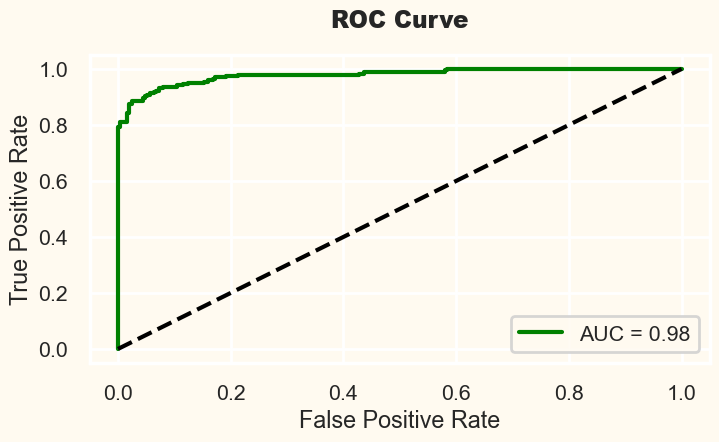

In [101]:
model_prediction(CatBoostClassifier(**catboost_Best_hyperparameters))

## Hyperparameter tuning for XGBoost with Optuna

In [102]:
RANDOM_SEED = np.random.seed(42)

In [103]:
'''def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 2, 15),
        'eta': trial.suggest_float('eta', 0.001, 0.1, log=True),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.05, 1.0),
        'subsample': trial.suggest_float('subsample', 0.05, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'n_estimators': trial.suggest_int('n_estimators', 500, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
    }

    # Build the xgboost model
    optuna_xgbmodel = XGBClassifier(**params, random_state=RANDOM_SEED)
    
    # Train the model 
    optuna_xgbmodel.fit(x_train, y_train)
    
    # Make the predictions
    y_pred = optuna_xgbmodel.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Create the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Print the best hyperparameters and test accuracy
print('Best hyperparameters:', study.best_params)
print('Best Test Accuracy:', study.best_value)
'''

"def objective(trial):\n    params = {\n        'objective': 'binary:logistic',\n        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),\n        'max_depth': trial.suggest_int('max_depth', 2, 15),\n        'eta': trial.suggest_float('eta', 0.001, 0.1, log=True),\n        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),\n        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.05, 1.0),\n        'subsample': trial.suggest_float('subsample', 0.05, 1.0),\n        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),\n        'n_estimators': trial.suggest_int('n_estimators', 500, 1000),\n        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),\n        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),\n        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),\n    }\n\n    # Build the xgboost model\n    optuna_xgbmodel = XGBClassifier(**params, random_state=RANDOM_SEED)\n    \n    # Train the model \n    optu

In [104]:
XGboost_Best_hyperparameters = {'alpha': 1.0828869784295189e-08, 'max_depth': 9, 'eta': 0.03353768080985071, 'gamma': 0.7309121971687413, 'colsample_bytree': 0.7618126951504659, 'subsample': 0.4105603727766567, 'min_child_weight': 2, 'n_estimators': 584, 'learning_rate': 0.06693301582532778, 'reg_alpha': 0.9517264929620095, 'reg_lambda': 0.7693580310442778}


------------------------------------------------------------------------
Accuracy_Score of XGBClassifier(alpha=1.0828869784295189e-08, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7618126951504659, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.03353768080985071, eval_metric=None, feature_types=None,
              gamma=0.7309121971687413, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06693301582532778,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=584, n_jobs=None, ...) model on Training Data is: 98.88438133874239
Accuracy_Score of XGBClassifier(alpha=1.0828869784295189e

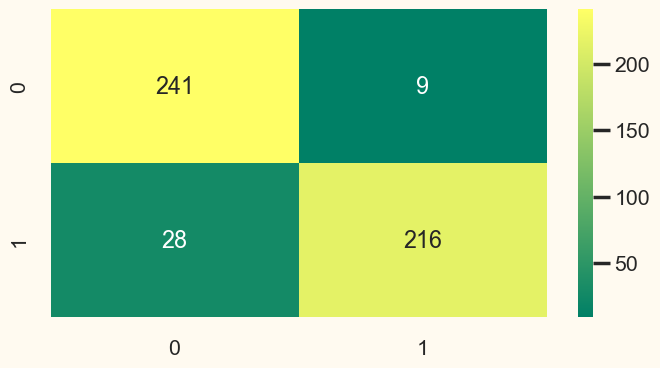


------------------------------------------------------------------------
ROC - AUC Curve of XGBClassifier(alpha=1.0828869784295189e-08, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7618126951504659, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.03353768080985071, eval_metric=None, feature_types=None,
              gamma=0.7309121971687413, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06693301582532778,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=584, n_jobs=None, ...) model is:


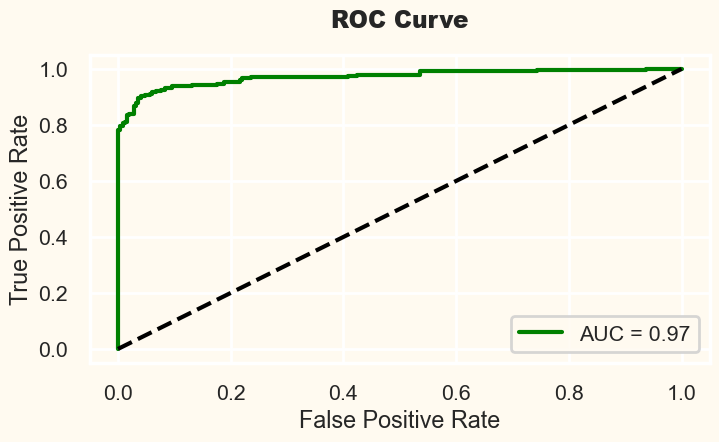

In [105]:
model_prediction(XGBClassifier(**XGboost_Best_hyperparameters, random_state=RANDOM_SEED))

## Hyperparameter tuning for AdaBoost with Optuna

In [106]:
'''# Define the objective function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'algorithm': trial.suggest_categorical('algorithm', ['SAMME', 'SAMME.R']),
        #'base_estimator__max_depth': trial.suggest_int('base_estimator__max_depth', 1, 10),
        #'base_estimator__min_samples_split': trial.suggest_int('base_estimator__min_samples_split', 2, 20),
        #'base_estimator__min_samples_leaf': trial.suggest_int('base_estimator__min_samples_leaf', 1, 10)
    }

    # Build the AdaBoost model
    adaboost_model = AdaBoostClassifier(**params, random_state=RANDOM_SEED)
    
    # Evaluate the model using cross-validation
    accuracy_scorer = make_scorer(accuracy_score)
    accuracies = cross_val_score(adaboost_model, x_train, y_train, cv=5, scoring=accuracy_scorer)

    # Return the average accuracy as the objective value
    return accuracies.mean()

# Create the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Print the best hyperparameters and test accuracy
print('Best hyperparameters:', study.best_params)
print('Best Test Accuracy:', study.best_value)
'''

"# Define the objective function for Optuna\ndef objective(trial):\n    params = {\n        'n_estimators': trial.suggest_int('n_estimators', 50, 500),\n        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),\n        'algorithm': trial.suggest_categorical('algorithm', ['SAMME', 'SAMME.R']),\n        #'base_estimator__max_depth': trial.suggest_int('base_estimator__max_depth', 1, 10),\n        #'base_estimator__min_samples_split': trial.suggest_int('base_estimator__min_samples_split', 2, 20),\n        #'base_estimator__min_samples_leaf': trial.suggest_int('base_estimator__min_samples_leaf', 1, 10)\n    }\n\n    # Build the AdaBoost model\n    adaboost_model = AdaBoostClassifier(**params, random_state=RANDOM_SEED)\n    \n    # Evaluate the model using cross-validation\n    accuracy_scorer = make_scorer(accuracy_score)\n    accuracies = cross_val_score(adaboost_model, x_train, y_train, cv=5, scoring=accuracy_scorer)\n\n    # Return the average accuracy as the objective v

In [107]:
Adaboost_Best_hyperparameters = {'n_estimators': 366, 'learning_rate': 0.9937295407270483, 'algorithm': 'SAMME'}


------------------------------------------------------------------------
Accuracy_Score of AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9937295407270483,
                   n_estimators=366) model on Training Data is: 94.3711967545639
Accuracy_Score of AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9937295407270483,
                   n_estimators=366) model on Testing Data is: 91.49797570850203
Precision Score of AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9937295407270483,
                   n_estimators=366) model is: 0.9508928571428571
Recall Score of AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9937295407270483,
                   n_estimators=366) model is: 0.8729508196721312
AUC Score of AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9937295407270483,
                   n_estimators=366) model is: 0.9631803278688525

------------------------------------------------------------------------
Classification Report of AdaBoostClassifier(algo

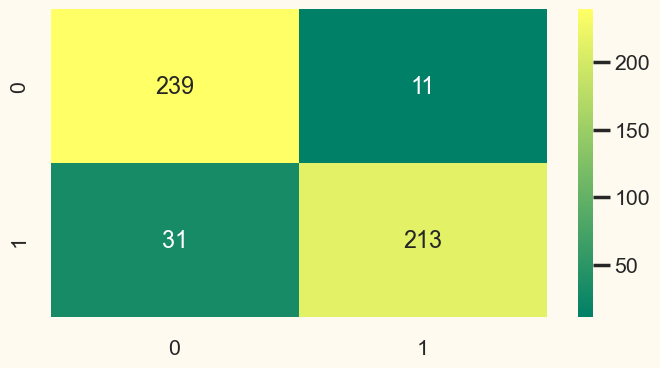


------------------------------------------------------------------------
ROC - AUC Curve of AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9937295407270483,
                   n_estimators=366) model is:


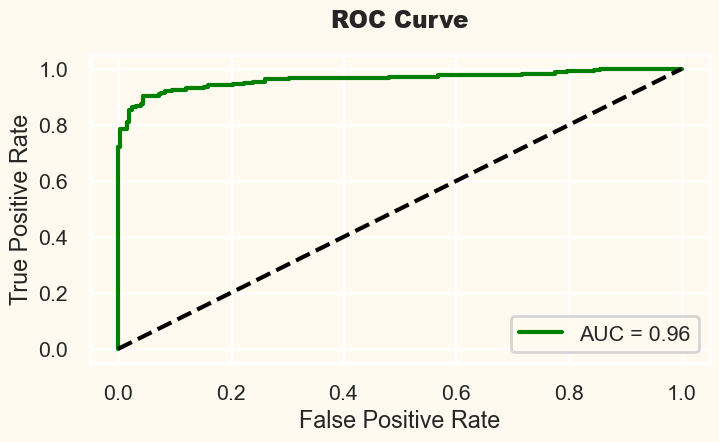

In [108]:
model_prediction(AdaBoostClassifier(**Adaboost_Best_hyperparameters))

## Optimising hyperparameters of Random Forest Classifier:

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print('Best hyperparameters for Random Forest:', grid_search.best_params_)
print('Best Test Accuracy for Random Forest:', grid_search.best_score_)


KeyboardInterrupt: 

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Implementing Neural Network</div>

In [131]:
import keras_tuner as kt

In [132]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(20,activation='relu',input_dim = 45,kernel_regularizer=tensorflow.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(Dense(15,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(1,activation='sigmoid'))
    
    optimizer=hp.Choice('optimizer', values = ['adam','sgd','rmsprop','adadelta'])
                        
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [133]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                       max_trials=5)

Reloading Tuner from .\untitled_project\tuner0.json


In [134]:
tuner.search(x_train,y_train,epochs=5,validation_data=( x_test,y_test))

In [135]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [136]:
def build_model(hp):
    model = Sequential()
    units = hp.Int('units',min_value = 8, max_value = 128 )
    model.add(Dense(20,activation='relu',input_dim = 45,kernel_regularizer=tensorflow.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(Dense(15,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    
    return model

In [137]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                       max_trials=5)

Reloading Tuner from .\untitled_project\tuner0.json


In [138]:
tuner.search(x_train,y_train,epochs = 5,validation_data=(x_test,y_test))

In [139]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [140]:
model = Sequential()

In [143]:
model.add(Dense(20,activation='relu',input_dim = 45,kernel_regularizer=tensorflow.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
model.add(Dense(15,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [144]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                920       
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 batch_normalization (Batch  (None, 15)                60        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 batch_normalization_1 (Bat  (None, 10)                40        
 chNormalization)                                       

In [122]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer = 'rmsprop',metrics=['accuracy'])

In [123]:
checkpoint_cb = tensorflow.keras.callbacks.ModelCheckpoint("Employe_Attrition.h5", save_best_only=True)
early_stopping_cb = tensorflow.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
#tensorboard_cb = tensorflow.keras.callbacks.TensorBoard(log_dir="logs")

#CALLBACKS = [checkpoint_cb, early_stopping_cb, tensorboard_cb]
CALLBACKS = [checkpoint_cb, early_stopping_cb]

history = model.fit(x_train1,y_train1,epochs=35,validation_split=0.2,callbacks = CALLBACKS)

Epoch 1/35


50/50 [==============================] - 5s 19ms/step - loss: 1.0486 - accuracy: 0.5212 - val_loss: 0.7255 - val_accuracy: 0.6127
Epoch 2/35
50/50 [==============================] - 0s 8ms/step - loss: 0.8614 - accuracy: 0.5866 - val_loss: 0.6777 - val_accuracy: 0.6785
Epoch 3/35
50/50 [==============================] - 0s 8ms/step - loss: 0.8344 - accuracy: 0.5923 - val_loss: 0.6373 - val_accuracy: 0.7266
Epoch 4/35
50/50 [==============================] - 1s 11ms/step - loss: 0.7220 - accuracy: 0.6569 - val_loss: 0.5868 - val_accuracy: 0.7848
Epoch 5/35
50/50 [==============================] - 0s 7ms/step - loss: 0.6735 - accuracy: 0.6944 - val_loss: 0.5436 - val_accuracy: 0.8127
Epoch 6/35
50/50 [==============================] - 0s 7ms/step - loss: 0.6560 - accuracy: 0.7235 - val_loss: 0.5055 - val_accuracy: 0.8203
Epoch 7/35
50/50 [==============================] - 0s 6ms/step - loss: 0.6008 - accuracy: 0.7483 - val_loss: 0.4752 - val_accuracy: 0.8506
Epoch 8/35
50/50

In [124]:
model.layers[0].get_weights()

[array([[-3.95551085e-01,  1.91843256e-01,  1.78886592e-01,
          3.38570803e-01,  1.04681544e-01, -1.07173510e-01,
         -1.04789943e-01, -1.31762341e-01,  1.39619187e-01,
         -1.87919095e-01, -1.43013522e-02, -3.15628320e-01,
          2.12095468e-03, -1.68027624e-01,  1.18417755e-01,
          4.96150739e-02, -7.61295334e-02, -1.12060353e-01,
         -3.81291881e-02, -8.97994563e-02],
        [-1.14739336e-01,  1.61511779e-01,  2.35342737e-02,
          9.83401760e-02,  9.41828191e-02,  2.17692852e-02,
         -4.12246771e-02, -9.01196823e-02, -1.27143711e-01,
         -1.76418900e-01, -9.19215977e-02, -2.71682173e-01,
         -7.66341165e-02,  1.36849418e-01,  8.03245381e-02,
          2.06339017e-01, -2.44910195e-01, -2.25196630e-01,
          1.53028160e-01, -1.83059677e-01],
        [ 1.34192556e-01,  1.27897367e-01,  4.04957235e-01,
          6.85910834e-03,  1.13283403e-01,  2.14566171e-01,
         -4.96714702e-03, -2.25490347e-01,  2.14701936e-01,
         -9.

In [125]:
y_log = model.predict(x_test1)

16/16 [==============================] - 0s 2ms/step


In [126]:
y_pred = np.where(y_log>0.5,1,0)

In [127]:
accuracy_score(y_test1,y_pred)

0.8765182186234818

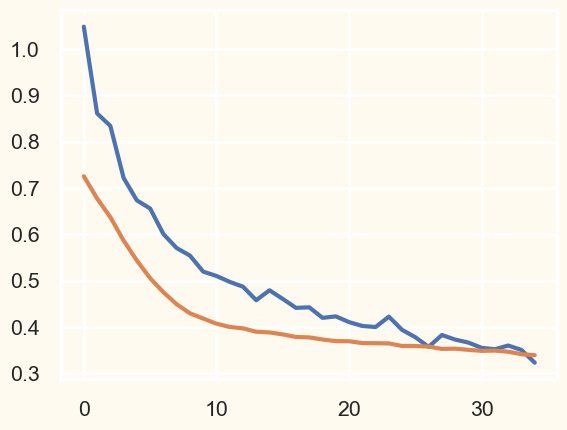

In [128]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

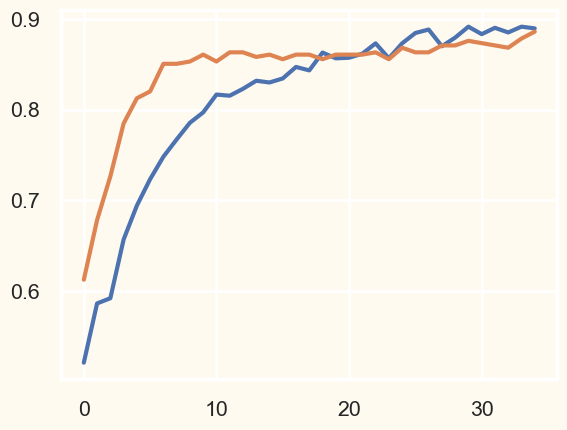

In [129]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

<Axes: >

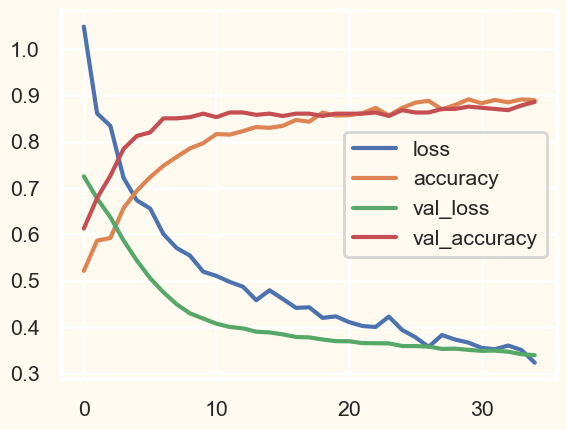

In [130]:
pd.DataFrame(history.history).plot()

In [131]:
#%load_ext tensorboard

In [132]:
#%tensorboard --logdir="logs"

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Ensemble Using Voting Classifier</div>

### Considering XGBoost optimised and Adaboost optimised

In [133]:
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(x_train,y_train)
GB_Model = GradientBoostingClassifier()
GB_Model.fit(x_train,y_train)

GradientBoostingClassifier()

In [134]:
#keras_classifier_model = KerasClassifier(model, epochs=32,verbose=0)

In [135]:
# Train an Ensemble model using a combination of the GBoost and adaboost Classifiers
ensemble_model = VotingClassifier(
    estimators=[
        ('adb', adaboost_model),
        ('gb', GB_Model),
        #('ANN',model)
    ],
    voting='soft'
)

# Use accuracy as the scoring parameter
accuracy_scores = cross_val_score(ensemble_model, x_train, y_train, cv=5, scoring='accuracy')

print("Accuracy scores for each fold:", accuracy_scores)
print("Average accuracy:", accuracy_scores.mean())


Accuracy scores for each fold: [0.92405063 0.91139241 0.92893401 0.91370558 0.91370558]
Average accuracy: 0.9183576431279317



------------------------------------------------------------------------
Accuracy_Score of VotingClassifier(estimators=[('adb', AdaBoostClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft') model on Training Data is: 96.45030425963489
Accuracy_Score of VotingClassifier(estimators=[('adb', AdaBoostClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft') model on Testing Data is: 92.71255060728745
Precision Score of VotingClassifier(estimators=[('adb', AdaBoostClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft') model is: 0.9601769911504425
Recall Score of VotingClassifier(estimators=[('adb', AdaBoostClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft') model is: 0.889344262295082
AUC Score of VotingClassifier(estimators=[('adb', AdaBoostClassifier(

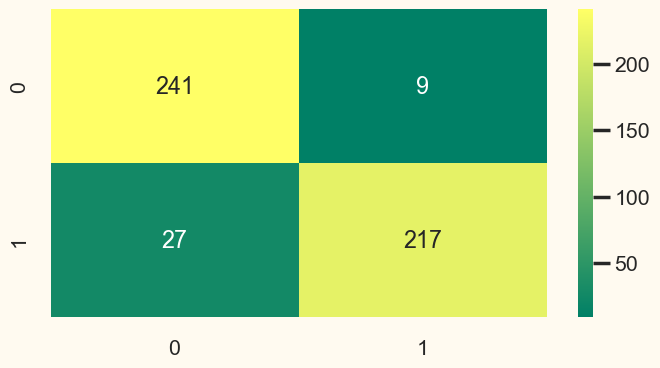


------------------------------------------------------------------------
ROC - AUC Curve of VotingClassifier(estimators=[('adb', AdaBoostClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft') model is:


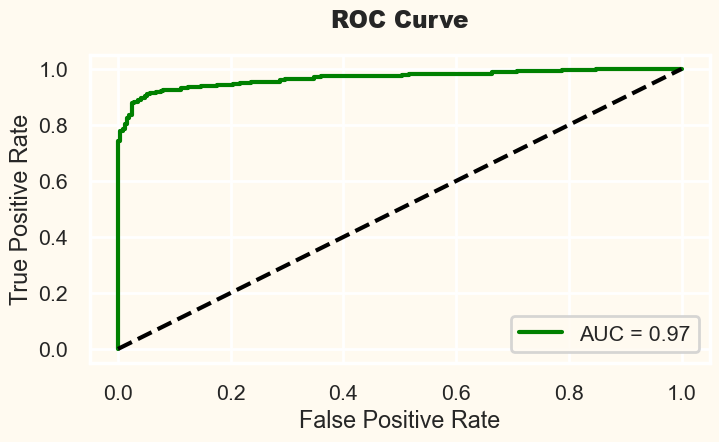

In [136]:
model_prediction(ensemble_model)

In [137]:
models = ["Logistic Regression","KNN","Naive Bayes","Decision Tree","Random Forest","Ada Boost","Gradient Boost","XGBoost","CatBoost","LGBM classifier","CatBoost_optimised","XGboost_optimised",'Adaboost_optimised',"Ensemble_Model"]

df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score,
                   "Precision": precission,
                   "Recall": recall,
                   "ROC_AUC Score": Roc_Auc_score,
                   "f1_Score": f1_score_,
                   "Kappa_Score": kappa_score,
                   "G_Mean": G_Mean})
df

Algorithms  Training Score  Testing Score  Precision    Recall  \
0   Logistic Regression       85.801217      86.437247   0.861224  0.864754   
1                   KNN       91.632860      89.271255   0.828179  0.987705   
2           Naive Bayes       76.369168      76.720648   0.717172  0.872951   
3         Decision Tree      100.000000      86.639676   0.856000  0.877049   
4         Random Forest      100.000000      93.117409   0.964602  0.893443   
5             Ada Boost       93.204868      91.295547   0.924051  0.897541   
6        Gradient Boost       96.501014      92.510121   0.955947  0.889344   
7               XGBoost      100.000000      92.307692   0.955752  0.885246   
8              CatBoost       99.594320      92.914980   0.964444  0.889344   
9       LGBM classifier      100.000000      92.510121   0.955947  0.889344   
10   CatBoost_optimised       99.898580      92.510121   0.960000  0.885246   
11    XGboost_optimised       98.884381      92.510121   0.960000  0.885246   
12   Adaboost_optimised       94.371197      91.497976   0.950893  0.872951   
13       Ensemble_Model       96.450304      92.712551   0.960177  0.889344   

    ROC_AUC Score  f1_Score  Kappa_Score    G_Mean  
0        0.925328  0.862986     0.728718  0.864377  
1        0.965361  0.900935     0.785888  0.893852  
2        0.873934  0.787431     0.535555  0.768475  
3        0.866525  0.866397     0.732833  0.866525  
4        0.981344  0.927660     0.862206  0.930721  
5        0.958328  0.910603     0.825825  0.912770  
6        0.966902  0.921444     0.850055  0.924672  
7        0.974672  0.919149     0.845995  0.922623  
8        0.973820  0.925373     0.858146  0.928672  
9        0.975689  0.921444     0.850055  0.924672  
10       0.978098  0.921109     0.850040  0.924623  
11       0.971377  0.921109     0.850040  0.924623  
12       0.963180  0.910256     0.829767  0.914475  
13       0.967311  0.923404     0.854100  0.926672

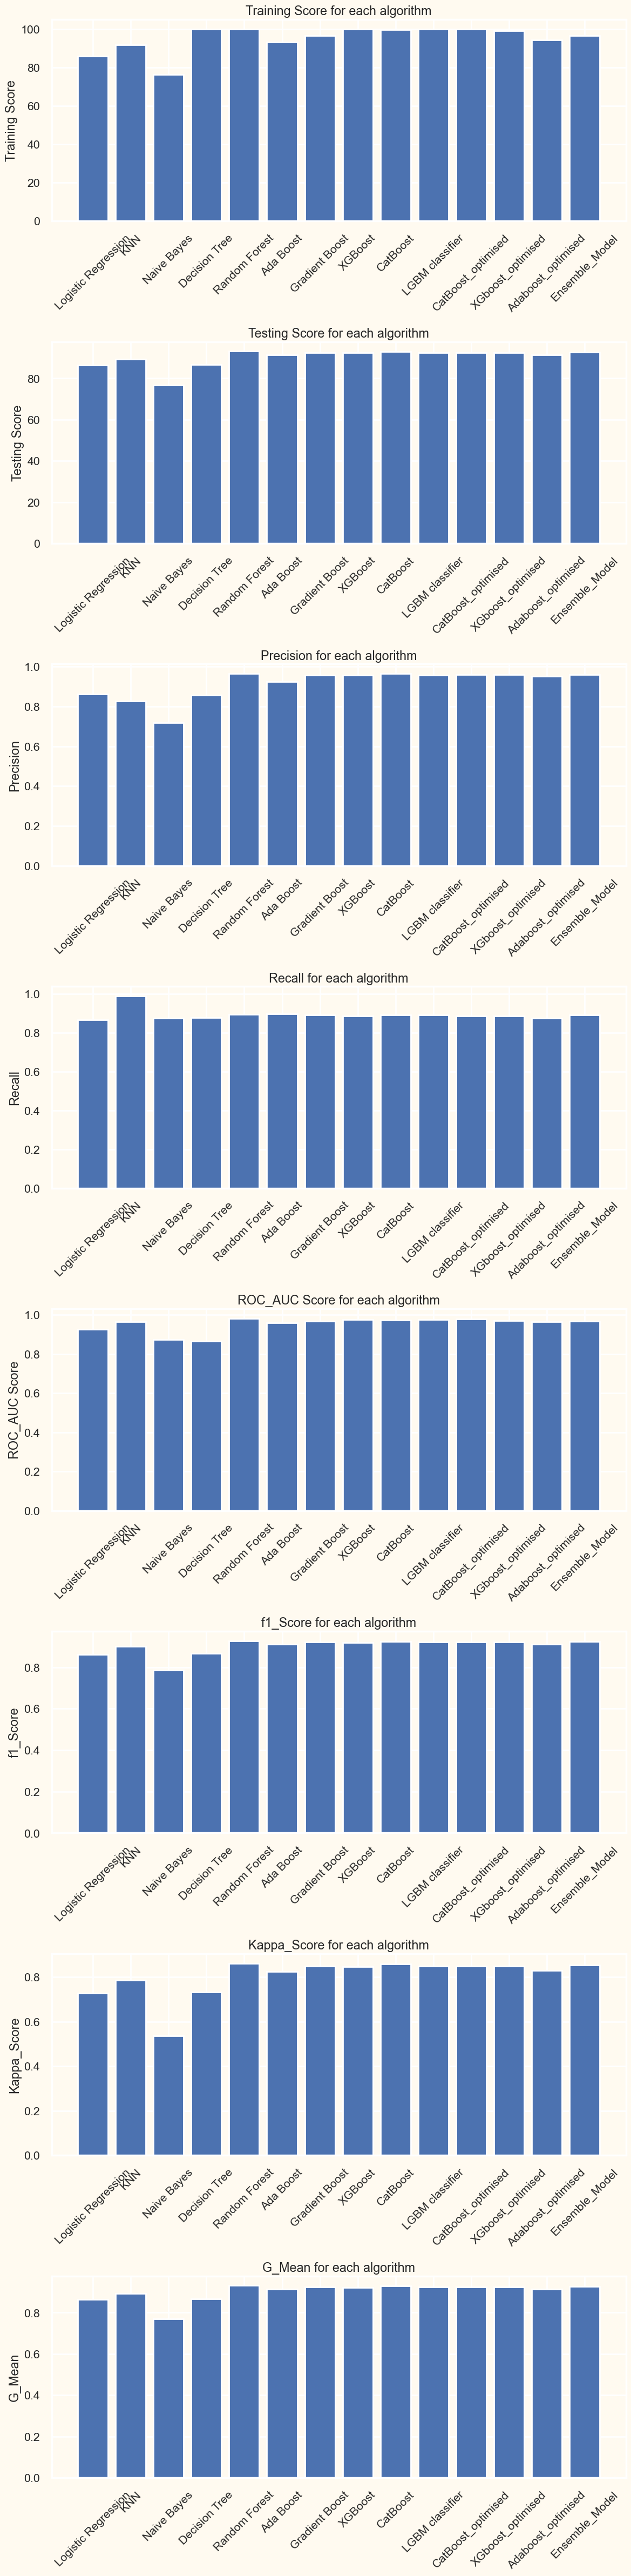

In [138]:
# Define metrics to plot
metrics_to_plot = ["Training Score", "Testing Score", "Precision", "Recall", "ROC_AUC Score", "f1_Score", "Kappa_Score", "G_Mean"]

# Create subplots
fig, axes = plt.subplots(nrows=len(metrics_to_plot), ncols=1, figsize=(12, 6*len(metrics_to_plot)))

# Plot each metric for every algorithm
for i, metric in enumerate(metrics_to_plot):
    axes[i].bar(df["Algorithms"], df[metric])
    axes[i].set_ylabel(metric)
    axes[i].set_title(f"{metric} for each algorithm")
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()